In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import polars as pl
import matplotlib.pyplot as plt
from pathlib import Path

data_dir = Path("../../data-transformation")
plot_dir = Path("Detailanalysen/2 Analyse kategorialer Attribute")

df = pl.read_parquet(data_dir / "transformed_label_first.parquet")

In [2]:
fraud_rate_total = df.select("label").to_pandas().value_counts(normalize=True)["FRAUD"]

In [26]:
def plot_categorical_attribute(col, angle=0, order = None, show=False):

  df2 = (
    df
      .group_by(col)
      .agg([
          pl.len().alias("total"),
          pl.col("label").filter(pl.col("label") == "FRAUD").count().alias("fraud_count"),
          pl.col("label").filter(pl.col("label") == "NORMAL").count().alias("normal_count"),
      ])
      .with_columns(
          (pl.col("fraud_count") / pl.col("total")).alias("fraud_rate")
      )
  )

  print(df2)

  plt.figure(figsize=(6, 4))
  sns.barplot(data=df2, x=col, y='fraud_rate', label='Anteil FRAUD Fälle', order=order)

  plt.axhline(fraud_rate_total, color='red', linestyle='--', label='Anteil FRAUD Fälle gesamt')

  plt.title(f'Anteil an FRAUD Fällen nach {col}')
  plt.xlabel(col)
  plt.ylabel('Anteil')
  plt.xticks(rotation=angle)
  plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

  plt.savefig(plot_dir / f"anteil_fraud_nach_{col}.png", bbox_inches='tight')
  plt.show()

  # plot fraud_count and normal_count for each payment_medium (plot with two subplots)
  fig, ax = plt.subplots(1, 2, figsize=(8,4), sharex=True)
  sns.barplot(x=col, y="fraud_count", data=df2.to_pandas(), ax=ax[0], order=order, color="lightcoral")
  ax[0].set_title("FRAUD")
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=angle)
  sns.barplot(x=col, y="normal_count", data=df2.to_pandas(), ax=ax[1], order=order)
  # main title above the two subplots
  fig.suptitle(f"Häufigkeit nach Kategorie {col}")
  ax[1].set_title("NORMAL")
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=angle)

  plt.tight_layout()
  plt.savefig(plot_dir / f"counts_normal_fraud_{col}.png")
  plt.show()


In [27]:
cat_cols = df.select(pl.col(pl.Categorical)).columns
cat_cols.remove("label")
cat_cols

['cash_desk',
 'payment_medium',
 'feedback_categorical',
 'daytime',
 'hour_categorical',
 'day_of_week',
 'month',
 'store_id',
 'location',
 'urbanization']




--------------------------------------------------

Plotting cash_desk...
shape: (4, 5)
┌───────────┬───────┬─────────────┬──────────────┬────────────┐
│ cash_desk ┆ total ┆ fraud_count ┆ normal_count ┆ fraud_rate │
│ ---       ┆ ---   ┆ ---         ┆ ---          ┆ ---        │
│ cat       ┆ u32   ┆ u32         ┆ u32          ┆ f64        │
╞═══════════╪═══════╪═════════════╪══════════════╪════════════╡
│ 3         ┆ 36752 ┆ 1167        ┆ 35585        ┆ 0.031753   │
│ 0         ┆ 37284 ┆ 1192        ┆ 36092        ┆ 0.031971   │
│ 1         ┆ 37093 ┆ 1134        ┆ 35959        ┆ 0.030572   │
│ 2         ┆ 36895 ┆ 1162        ┆ 35733        ┆ 0.031495   │
└───────────┴───────┴─────────────┴──────────────┴────────────┘


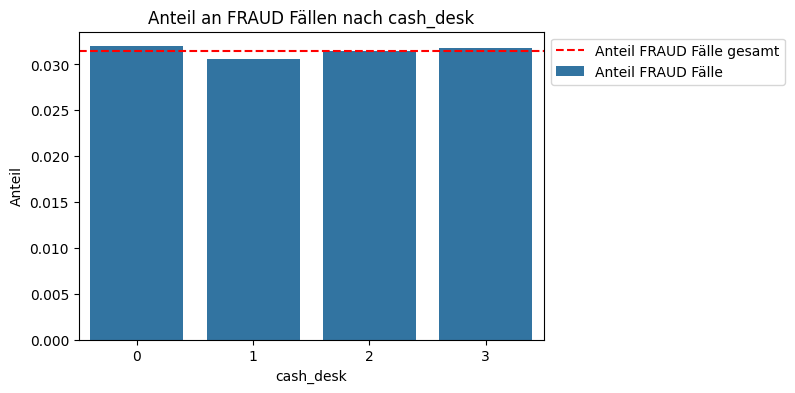

/tmp/ipykernel_10570/851633957.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=angle)
/tmp/ipykernel_10570/851633957.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=angle)


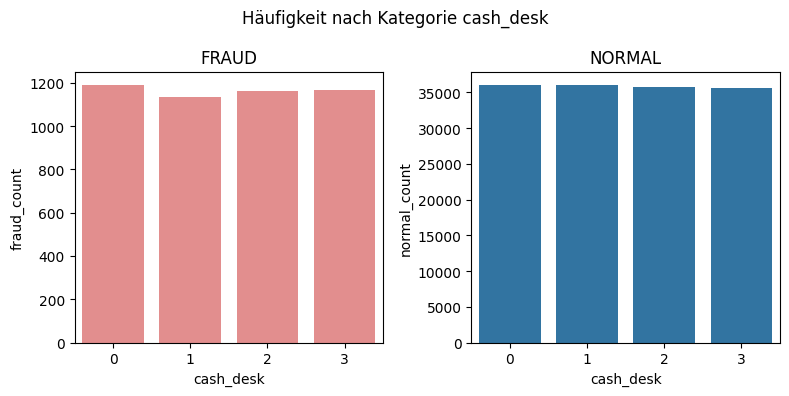




--------------------------------------------------

Plotting payment_medium...
shape: (2, 5)
┌────────────────┬────────┬─────────────┬──────────────┬────────────┐
│ payment_medium ┆ total  ┆ fraud_count ┆ normal_count ┆ fraud_rate │
│ ---            ┆ ---    ┆ ---         ┆ ---          ┆ ---        │
│ cat            ┆ u32    ┆ u32         ┆ u32          ┆ f64        │
╞════════════════╪════════╪═════════════╪══════════════╪════════════╡
│ CREDIT_CARD    ┆ 133336 ┆ 1746        ┆ 131590       ┆ 0.013095   │
│ CASH           ┆ 14688  ┆ 2909        ┆ 11779        ┆ 0.198053   │
└────────────────┴────────┴─────────────┴──────────────┴────────────┘


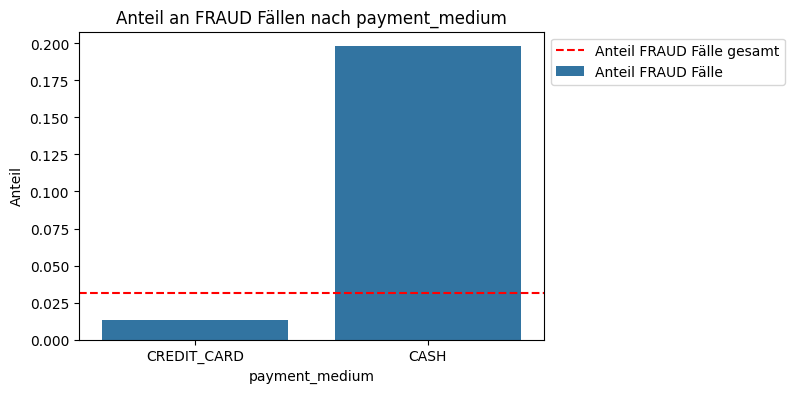

/tmp/ipykernel_10570/851633957.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=angle)
/tmp/ipykernel_10570/851633957.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=angle)


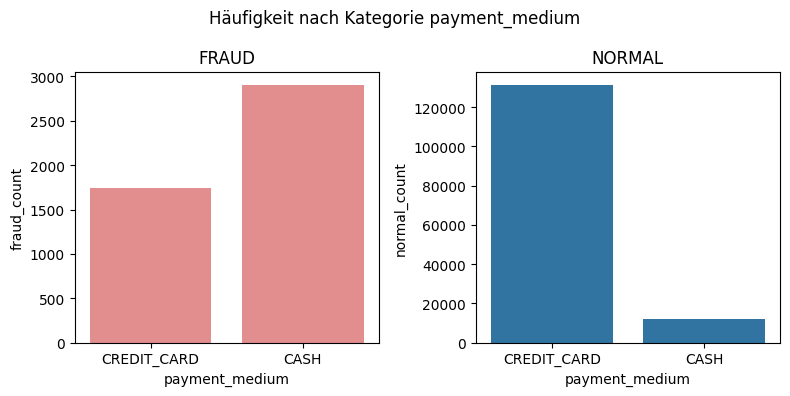




--------------------------------------------------

Plotting feedback_categorical...
shape: (5, 5)
┌──────────────────────┬────────┬─────────────┬──────────────┬────────────┐
│ feedback_categorical ┆ total  ┆ fraud_count ┆ normal_count ┆ fraud_rate │
│ ---                  ┆ ---    ┆ ---         ┆ ---          ┆ ---        │
│ cat                  ┆ u32    ┆ u32         ┆ u32          ┆ f64        │
╞══════════════════════╪════════╪═════════════╪══════════════╪════════════╡
│ MIDDLE               ┆ 548    ┆ 6           ┆ 542          ┆ 0.010949   │
│ MISSING              ┆ 137380 ┆ 4306        ┆ 133074       ┆ 0.031344   │
│ LOW                  ┆ 259    ┆ 2           ┆ 257          ┆ 0.007722   │
│ TOP                  ┆ 8523   ┆ 332         ┆ 8191         ┆ 0.038953   │
│ HIGH                 ┆ 1314   ┆ 9           ┆ 1305         ┆ 0.006849   │
└──────────────────────┴────────┴─────────────┴──────────────┴────────────┘


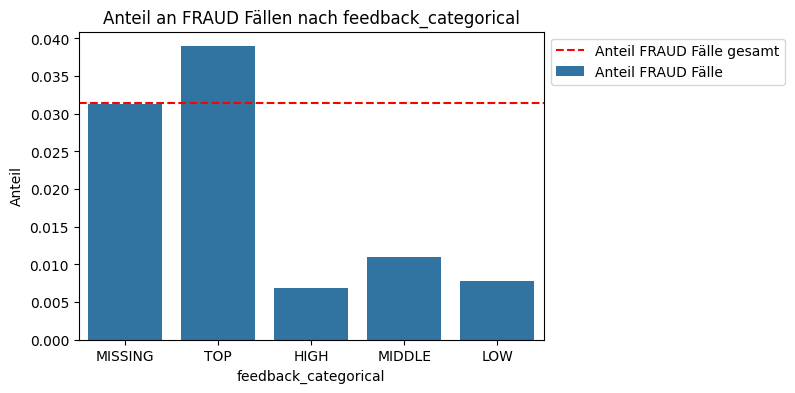

/tmp/ipykernel_10570/851633957.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=angle)
/tmp/ipykernel_10570/851633957.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=angle)


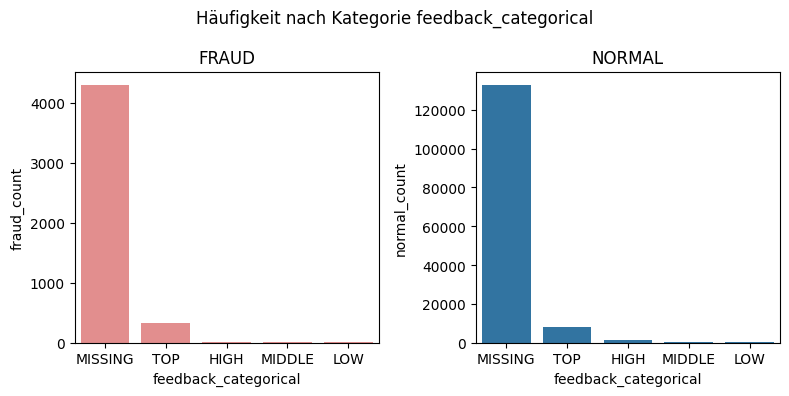




--------------------------------------------------

Plotting daytime...
shape: (4, 5)
┌───────────┬───────┬─────────────┬──────────────┬────────────┐
│ daytime   ┆ total ┆ fraud_count ┆ normal_count ┆ fraud_rate │
│ ---       ┆ ---   ┆ ---         ┆ ---          ┆ ---        │
│ cat       ┆ u32   ┆ u32         ┆ u32          ┆ f64        │
╞═══════════╪═══════╪═════════════╪══════════════╪════════════╡
│ evening   ┆ 19111 ┆ 920         ┆ 18191        ┆ 0.04814    │
│ morning   ┆ 35209 ┆ 785         ┆ 34424        ┆ 0.022295   │
│ noon      ┆ 45448 ┆ 1168        ┆ 44280        ┆ 0.0257     │
│ afternoon ┆ 48256 ┆ 1782        ┆ 46474        ┆ 0.036928   │
└───────────┴───────┴─────────────┴──────────────┴────────────┘


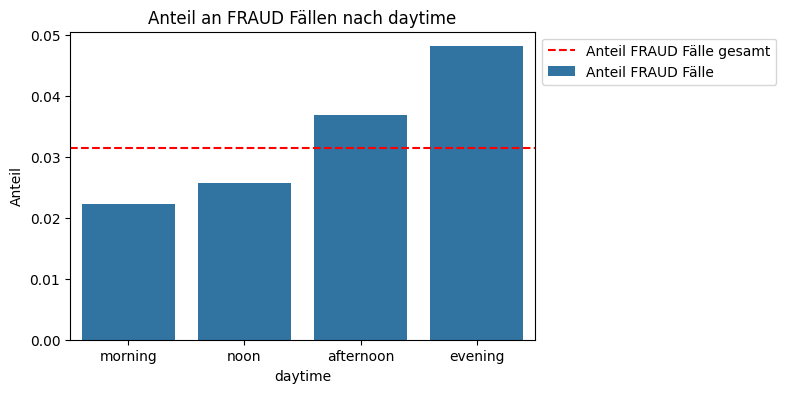

/tmp/ipykernel_10570/851633957.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=angle)
/tmp/ipykernel_10570/851633957.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=angle)


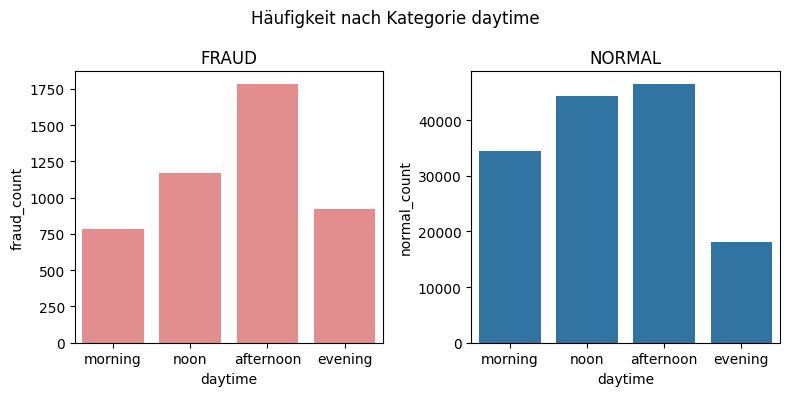




--------------------------------------------------

Plotting hour_categorical...
shape: (15, 5)
┌──────────────────┬───────┬─────────────┬──────────────┬────────────┐
│ hour_categorical ┆ total ┆ fraud_count ┆ normal_count ┆ fraud_rate │
│ ---              ┆ ---   ┆ ---         ┆ ---          ┆ ---        │
│ cat              ┆ u32   ┆ u32         ┆ u32          ┆ f64        │
╞══════════════════╪═══════╪═════════════╪══════════════╪════════════╡
│ 20               ┆ 10136 ┆ 460         ┆ 9676         ┆ 0.045383   │
│ 17               ┆ 12385 ┆ 439         ┆ 11946        ┆ 0.035446   │
│ 8                ┆ 7612  ┆ 158         ┆ 7454         ┆ 0.020757   │
│ 14               ┆ 11026 ┆ 298         ┆ 10728        ┆ 0.027027   │
│ 11               ┆ 11297 ┆ 293         ┆ 11004        ┆ 0.025936   │
│ …                ┆ …     ┆ …           ┆ …            ┆ …          │
│ 22               ┆ 1     ┆ 0           ┆ 1            ┆ 0.0        │
│ 13               ┆ 11009 ┆ 269         ┆ 10740 

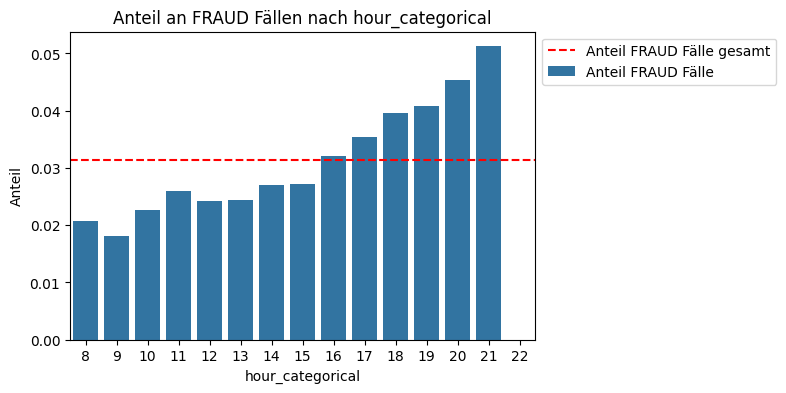

/tmp/ipykernel_10570/851633957.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=angle)
/tmp/ipykernel_10570/851633957.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=angle)


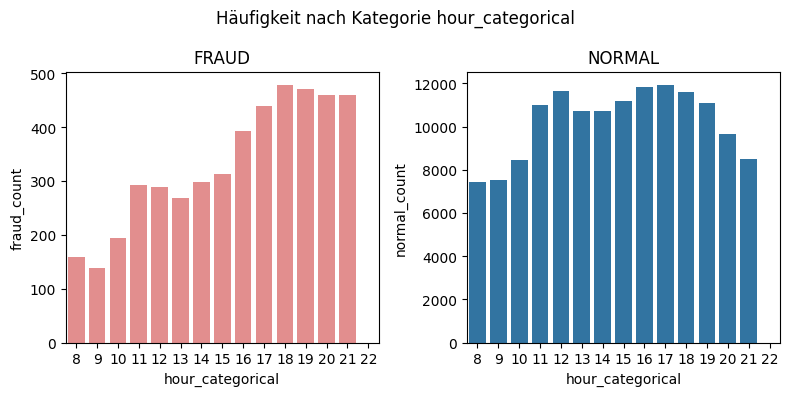




--------------------------------------------------

Plotting location...
shape: (5, 5)
┌──────────┬───────┬─────────────┬──────────────┬────────────┐
│ location ┆ total ┆ fraud_count ┆ normal_count ┆ fraud_rate │
│ ---      ┆ ---   ┆ ---         ┆ ---          ┆ ---        │
│ cat      ┆ u32   ┆ u32         ┆ u32          ┆ f64        │
╞══════════╪═══════╪═════════════╪══════════════╪════════════╡
│ BN       ┆ 23110 ┆ 746         ┆ 22364        ┆ 0.03228    │
│ K        ┆ 30061 ┆ 909         ┆ 29152        ┆ 0.030239   │
│ DO       ┆ 19555 ┆ 605         ┆ 18950        ┆ 0.030938   │
│ D        ┆ 37378 ┆ 1196        ┆ 36182        ┆ 0.031997   │
│ S        ┆ 37920 ┆ 1199        ┆ 36721        ┆ 0.031619   │
└──────────┴───────┴─────────────┴──────────────┴────────────┘


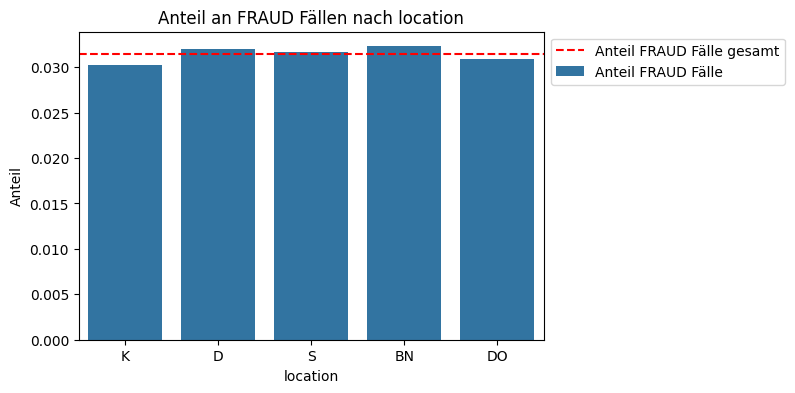

/tmp/ipykernel_10570/851633957.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=angle)
/tmp/ipykernel_10570/851633957.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=angle)


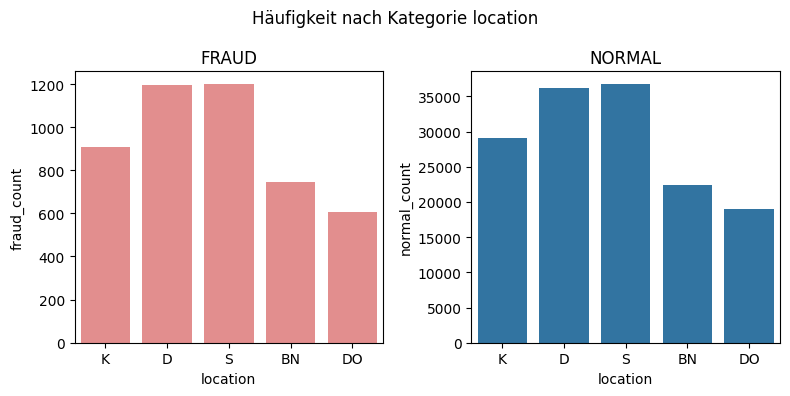




--------------------------------------------------

Plotting urbanization...
shape: (3, 5)
┌──────────────┬───────┬─────────────┬──────────────┬────────────┐
│ urbanization ┆ total ┆ fraud_count ┆ normal_count ┆ fraud_rate │
│ ---          ┆ ---   ┆ ---         ┆ ---          ┆ ---        │
│ cat          ┆ u32   ┆ u32         ┆ u32          ┆ f64        │
╞══════════════╪═══════╪═════════════╪══════════════╪════════════╡
│ RURAL        ┆ 30061 ┆ 909         ┆ 29152        ┆ 0.030239   │
│ TOWNS        ┆ 60488 ┆ 1942        ┆ 58546        ┆ 0.032106   │
│ CITIES       ┆ 57475 ┆ 1804        ┆ 55671        ┆ 0.031388   │
└──────────────┴───────┴─────────────┴──────────────┴────────────┘


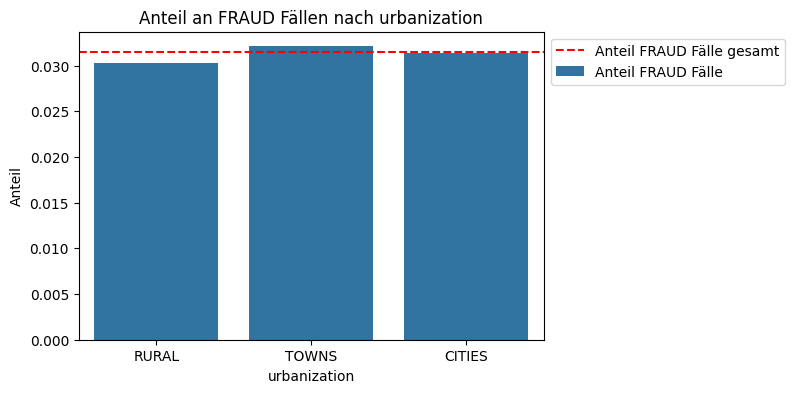

/tmp/ipykernel_10570/851633957.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=angle)
/tmp/ipykernel_10570/851633957.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=angle)


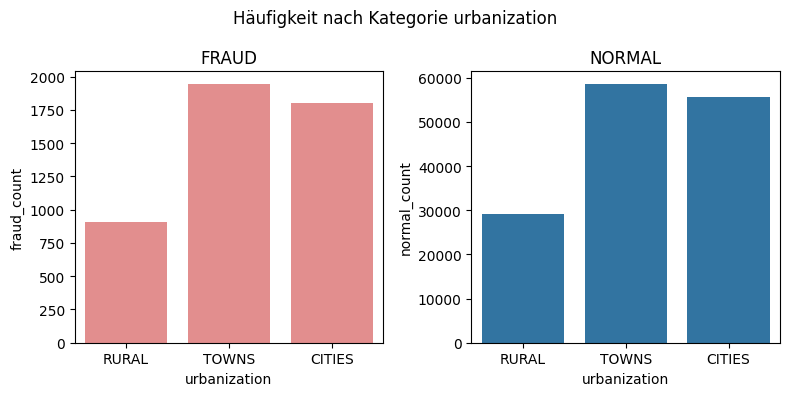

shape: (12, 5)
┌──────────┬───────┬─────────────┬──────────────┬────────────┐
│ month    ┆ total ┆ fraud_count ┆ normal_count ┆ fraud_rate │
│ ---      ┆ ---   ┆ ---         ┆ ---          ┆ ---        │
│ cat      ┆ u32   ┆ u32         ┆ u32          ┆ f64        │
╞══════════╪═══════╪═════════════╪══════════════╪════════════╡
│ November ┆ 11743 ┆ 372         ┆ 11371        ┆ 0.031678   │
│ August   ┆ 14001 ┆ 471         ┆ 13530        ┆ 0.03364    │
│ February ┆ 8332  ┆ 260         ┆ 8072         ┆ 0.031205   │
│ May      ┆ 12627 ┆ 415         ┆ 12212        ┆ 0.032866   │
│ June     ┆ 13686 ┆ 451         ┆ 13235        ┆ 0.032953   │
│ …        ┆ …     ┆ …           ┆ …            ┆ …          │
│ December ┆ 14063 ┆ 426         ┆ 13637        ┆ 0.030292   │
│ October  ┆ 12497 ┆ 392         ┆ 12105        ┆ 0.031368   │
│ January  ┆ 5801  ┆ 182         ┆ 5619         ┆ 0.031374   │
│ April    ┆ 14793 ┆ 466         ┆ 14327        ┆ 0.031501   │
│ July     ┆ 14829 ┆ 444         ┆ 14385

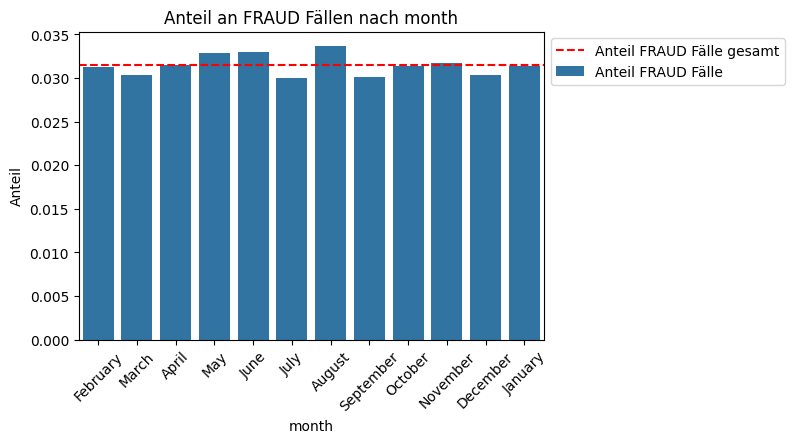

/tmp/ipykernel_10570/851633957.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=angle)
/tmp/ipykernel_10570/851633957.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=angle)


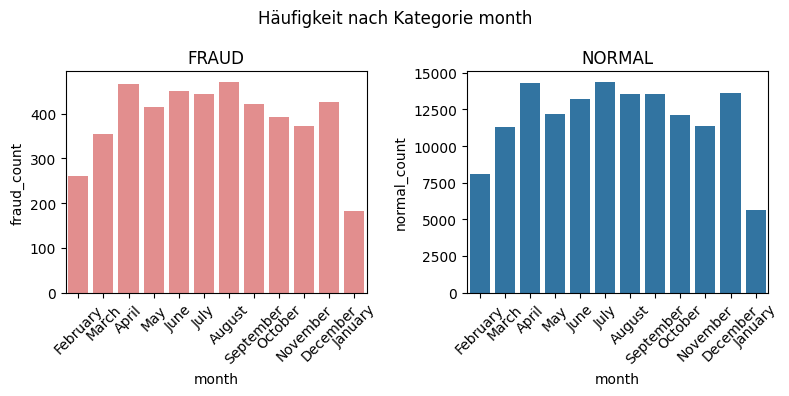

shape: (6, 5)
┌─────────────┬───────┬─────────────┬──────────────┬────────────┐
│ day_of_week ┆ total ┆ fraud_count ┆ normal_count ┆ fraud_rate │
│ ---         ┆ ---   ┆ ---         ┆ ---          ┆ ---        │
│ cat         ┆ u32   ┆ u32         ┆ u32          ┆ f64        │
╞═════════════╪═══════╪═════════════╪══════════════╪════════════╡
│ Wednesday   ┆ 14332 ┆ 415         ┆ 13917        ┆ 0.028956   │
│ Saturday    ┆ 42143 ┆ 1377        ┆ 40766        ┆ 0.032674   │
│ Thursday    ┆ 17727 ┆ 591         ┆ 17136        ┆ 0.033339   │
│ Monday      ┆ 24717 ┆ 768         ┆ 23949        ┆ 0.031072   │
│ Tuesday     ┆ 15169 ┆ 425         ┆ 14744        ┆ 0.028018   │
│ Friday      ┆ 33936 ┆ 1079        ┆ 32857        ┆ 0.031795   │
└─────────────┴───────┴─────────────┴──────────────┴────────────┘


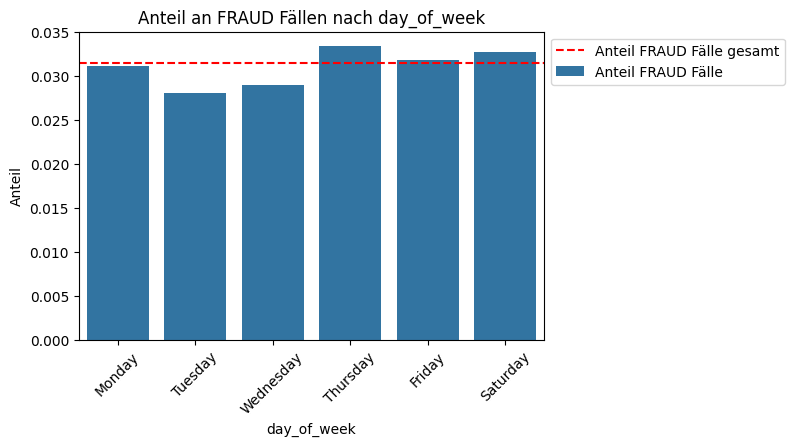

/tmp/ipykernel_10570/851633957.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=angle)
/tmp/ipykernel_10570/851633957.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=angle)


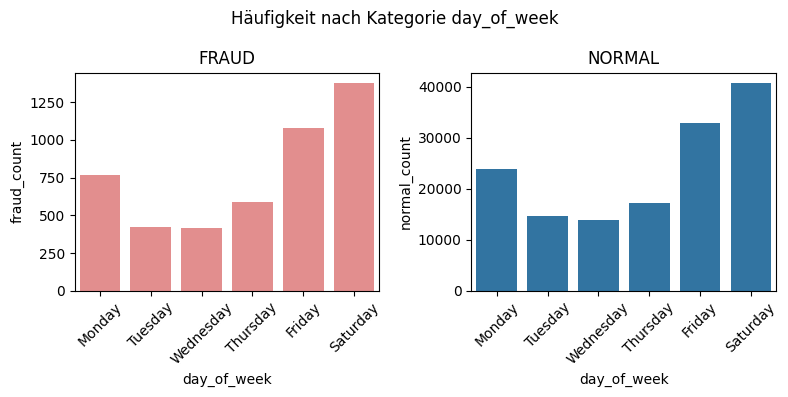

In [28]:
cols_to_plot = [
 'cash_desk',
 'payment_medium',
 'feedback_categorical',
 'daytime',
 'hour_categorical',
 'location',
 'urbanization'
]

for col in cols_to_plot:
  print("\n\n")
  print("-" * 50)
  print(f"\nPlotting {col}...")
  plot_categorical_attribute(col)


plot_categorical_attribute("month", angle=45)
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
plot_categorical_attribute("day_of_week", angle=45, order=weekday_order)




--------------------------------------------------

Plotting has_feedback...
shape: (2, 5)
┌──────────────┬────────┬─────────────┬──────────────┬────────────┐
│ has_feedback ┆ total  ┆ fraud_count ┆ normal_count ┆ fraud_rate │
│ ---          ┆ ---    ┆ ---         ┆ ---          ┆ ---        │
│ bool         ┆ u32    ┆ u32         ┆ u32          ┆ f64        │
╞══════════════╪════════╪═════════════╪══════════════╪════════════╡
│ false        ┆ 137380 ┆ 4306        ┆ 133074       ┆ 0.031344   │
│ true         ┆ 10644  ┆ 349         ┆ 10295        ┆ 0.032788   │
└──────────────┴────────┴─────────────┴──────────────┴────────────┘


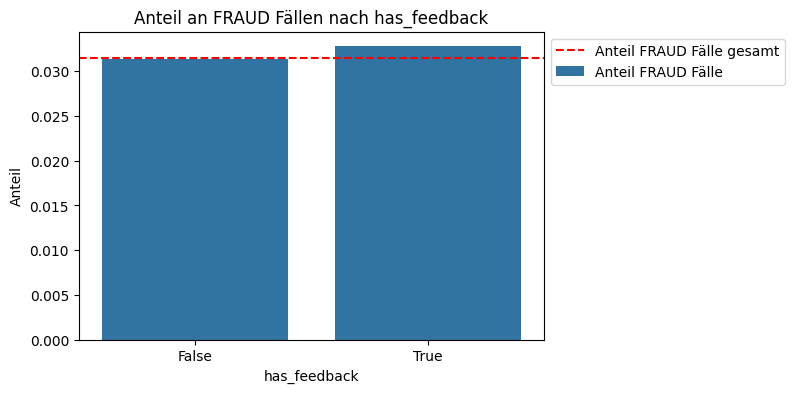

/tmp/ipykernel_10570/851633957.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=angle)
/tmp/ipykernel_10570/851633957.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=angle)


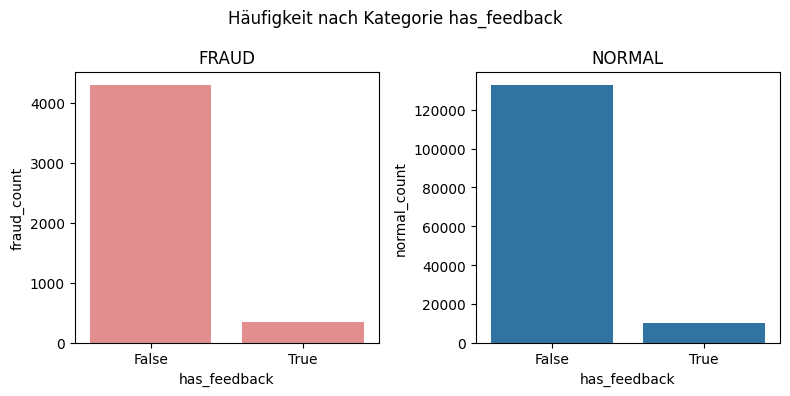




--------------------------------------------------

Plotting feedback_low...
shape: (2, 5)
┌──────────────┬────────┬─────────────┬──────────────┬────────────┐
│ feedback_low ┆ total  ┆ fraud_count ┆ normal_count ┆ fraud_rate │
│ ---          ┆ ---    ┆ ---         ┆ ---          ┆ ---        │
│ bool         ┆ u32    ┆ u32         ┆ u32          ┆ f64        │
╞══════════════╪════════╪═════════════╪══════════════╪════════════╡
│ false        ┆ 147765 ┆ 4653        ┆ 143112       ┆ 0.031489   │
│ true         ┆ 259    ┆ 2           ┆ 257          ┆ 0.007722   │
└──────────────┴────────┴─────────────┴──────────────┴────────────┘


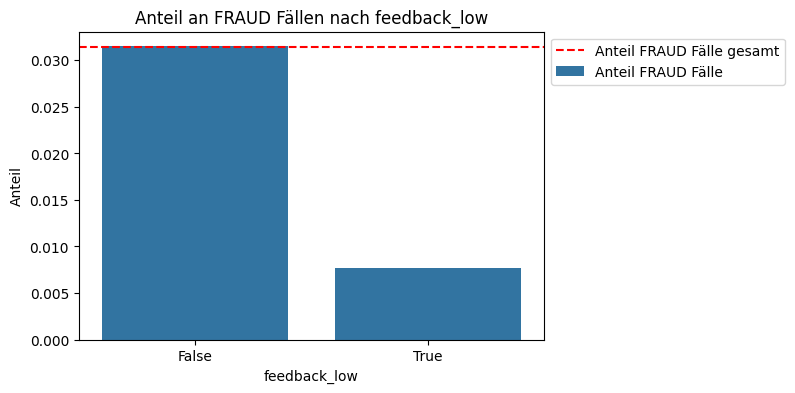

/tmp/ipykernel_10570/851633957.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=angle)
/tmp/ipykernel_10570/851633957.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=angle)


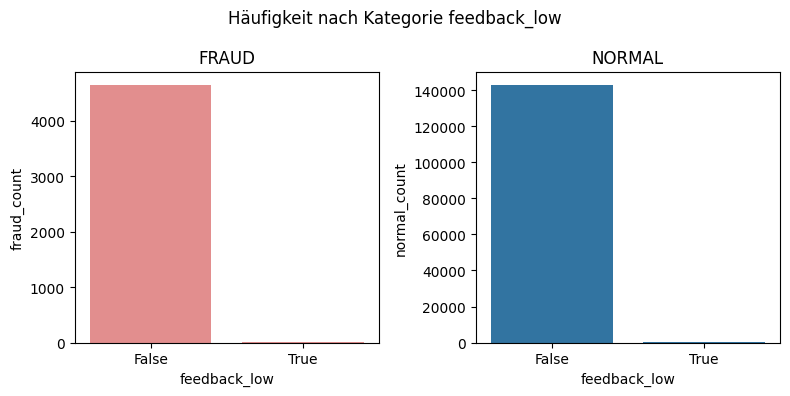




--------------------------------------------------

Plotting feedback_middle...
shape: (2, 5)
┌─────────────────┬────────┬─────────────┬──────────────┬────────────┐
│ feedback_middle ┆ total  ┆ fraud_count ┆ normal_count ┆ fraud_rate │
│ ---             ┆ ---    ┆ ---         ┆ ---          ┆ ---        │
│ bool            ┆ u32    ┆ u32         ┆ u32          ┆ f64        │
╞═════════════════╪════════╪═════════════╪══════════════╪════════════╡
│ false           ┆ 147476 ┆ 4649        ┆ 142827       ┆ 0.031524   │
│ true            ┆ 548    ┆ 6           ┆ 542          ┆ 0.010949   │
└─────────────────┴────────┴─────────────┴──────────────┴────────────┘


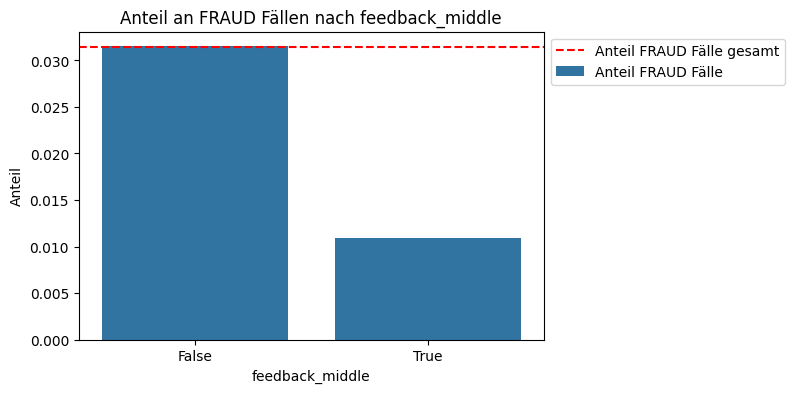

/tmp/ipykernel_10570/851633957.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=angle)
/tmp/ipykernel_10570/851633957.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=angle)


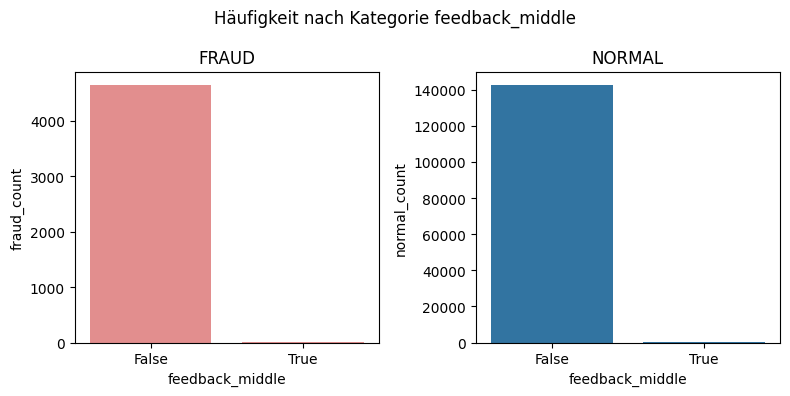




--------------------------------------------------

Plotting feedback_high...
shape: (2, 5)
┌───────────────┬────────┬─────────────┬──────────────┬────────────┐
│ feedback_high ┆ total  ┆ fraud_count ┆ normal_count ┆ fraud_rate │
│ ---           ┆ ---    ┆ ---         ┆ ---          ┆ ---        │
│ bool          ┆ u32    ┆ u32         ┆ u32          ┆ f64        │
╞═══════════════╪════════╪═════════════╪══════════════╪════════════╡
│ false         ┆ 146710 ┆ 4646        ┆ 142064       ┆ 0.031668   │
│ true          ┆ 1314   ┆ 9           ┆ 1305         ┆ 0.006849   │
└───────────────┴────────┴─────────────┴──────────────┴────────────┘


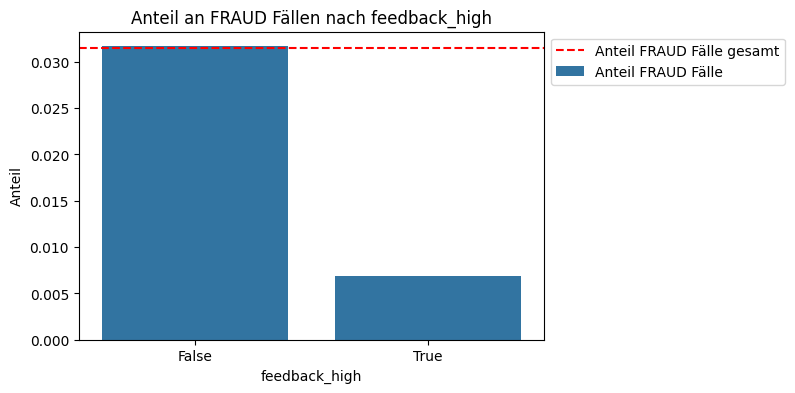

/tmp/ipykernel_10570/851633957.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=angle)
/tmp/ipykernel_10570/851633957.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=angle)


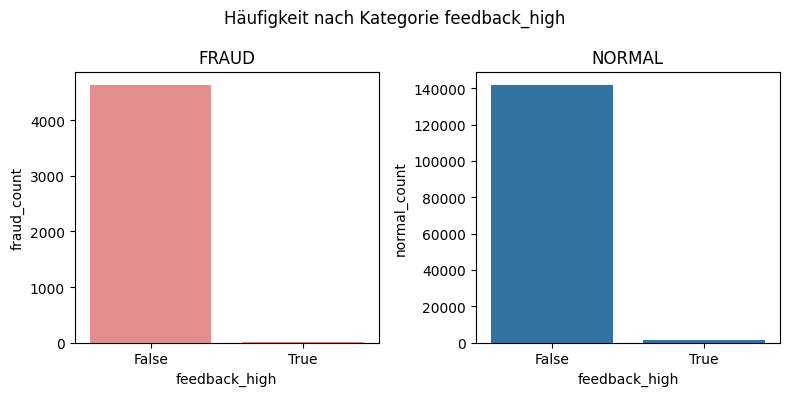




--------------------------------------------------

Plotting feedback_top...
shape: (2, 5)
┌──────────────┬────────┬─────────────┬──────────────┬────────────┐
│ feedback_top ┆ total  ┆ fraud_count ┆ normal_count ┆ fraud_rate │
│ ---          ┆ ---    ┆ ---         ┆ ---          ┆ ---        │
│ bool         ┆ u32    ┆ u32         ┆ u32          ┆ f64        │
╞══════════════╪════════╪═════════════╪══════════════╪════════════╡
│ false        ┆ 139501 ┆ 4323        ┆ 135178       ┆ 0.030989   │
│ true         ┆ 8523   ┆ 332         ┆ 8191         ┆ 0.038953   │
└──────────────┴────────┴─────────────┴──────────────┴────────────┘


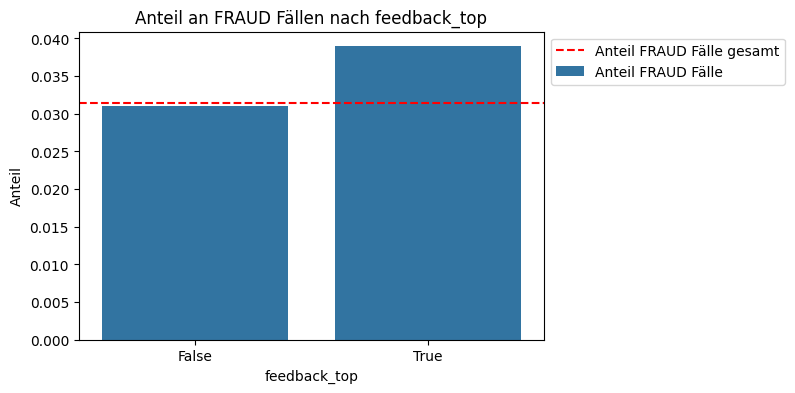

/tmp/ipykernel_10570/851633957.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=angle)
/tmp/ipykernel_10570/851633957.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=angle)


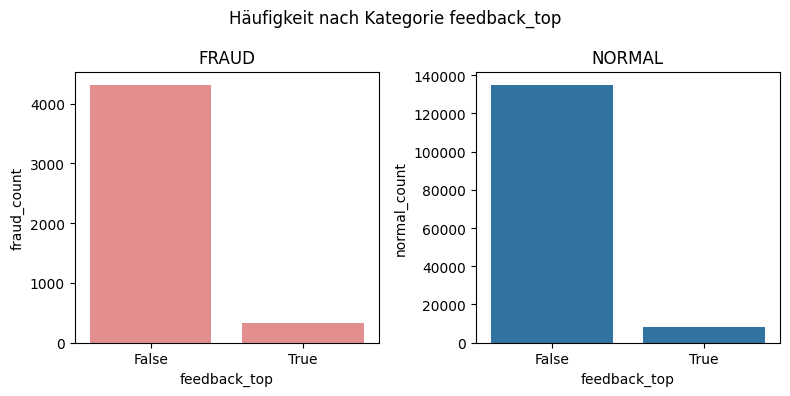




--------------------------------------------------

Plotting has_voided...
shape: (2, 5)
┌────────────┬────────┬─────────────┬──────────────┬────────────┐
│ has_voided ┆ total  ┆ fraud_count ┆ normal_count ┆ fraud_rate │
│ ---        ┆ ---    ┆ ---         ┆ ---          ┆ ---        │
│ bool       ┆ u32    ┆ u32         ┆ u32          ┆ f64        │
╞════════════╪════════╪═════════════╪══════════════╪════════════╡
│ false      ┆ 137023 ┆ 4177        ┆ 132846       ┆ 0.030484   │
│ true       ┆ 11001  ┆ 478         ┆ 10523        ┆ 0.043451   │
└────────────┴────────┴─────────────┴──────────────┴────────────┘


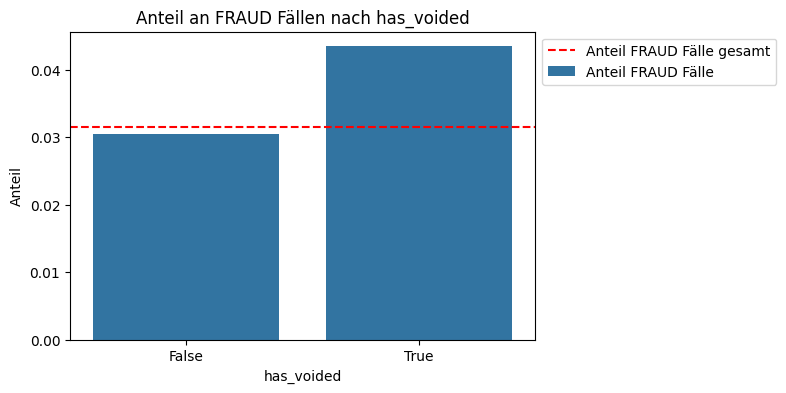

/tmp/ipykernel_10570/851633957.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=angle)
/tmp/ipykernel_10570/851633957.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=angle)


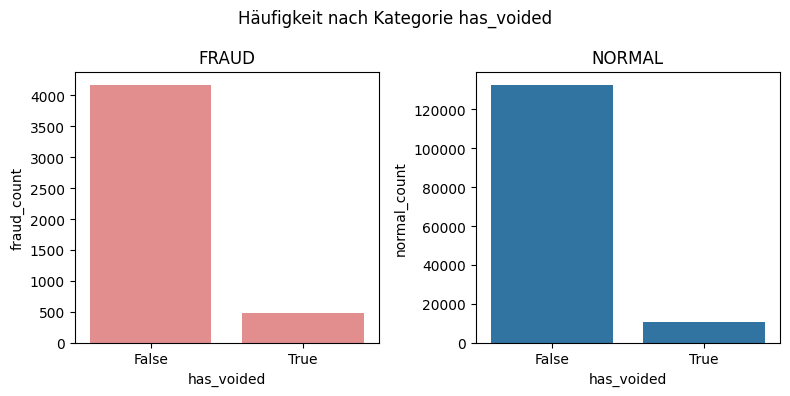




--------------------------------------------------

Plotting has_age_restricted...
shape: (2, 5)
┌────────────────────┬────────┬─────────────┬──────────────┬────────────┐
│ has_age_restricted ┆ total  ┆ fraud_count ┆ normal_count ┆ fraud_rate │
│ ---                ┆ ---    ┆ ---         ┆ ---          ┆ ---        │
│ bool               ┆ u32    ┆ u32         ┆ u32          ┆ f64        │
╞════════════════════╪════════╪═════════════╪══════════════╪════════════╡
│ false              ┆ 144811 ┆ 4583        ┆ 140228       ┆ 0.031648   │
│ true               ┆ 3213   ┆ 72          ┆ 3141         ┆ 0.022409   │
└────────────────────┴────────┴─────────────┴──────────────┴────────────┘


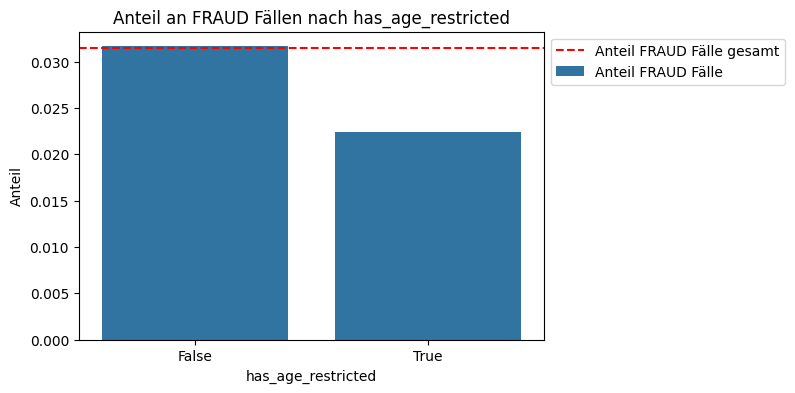

/tmp/ipykernel_10570/851633957.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=angle)
/tmp/ipykernel_10570/851633957.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=angle)


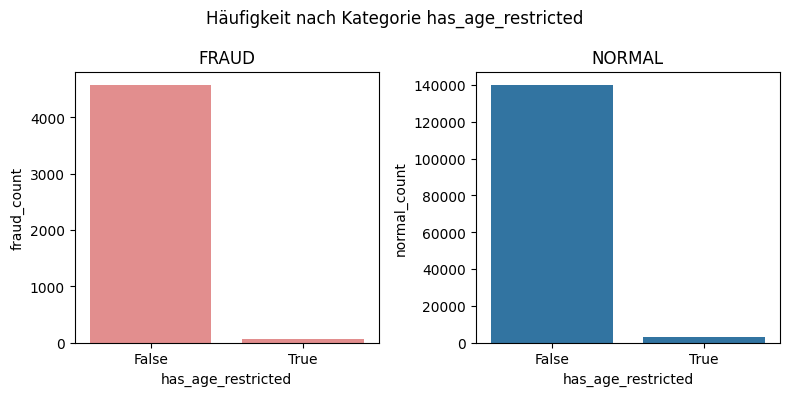




--------------------------------------------------

Plotting has_sold_by_weight...
shape: (2, 5)
┌────────────────────┬────────┬─────────────┬──────────────┬────────────┐
│ has_sold_by_weight ┆ total  ┆ fraud_count ┆ normal_count ┆ fraud_rate │
│ ---                ┆ ---    ┆ ---         ┆ ---          ┆ ---        │
│ bool               ┆ u32    ┆ u32         ┆ u32          ┆ f64        │
╞════════════════════╪════════╪═════════════╪══════════════╪════════════╡
│ false              ┆ 144686 ┆ 4513        ┆ 140173       ┆ 0.031192   │
│ true               ┆ 3338   ┆ 142         ┆ 3196         ┆ 0.04254    │
└────────────────────┴────────┴─────────────┴──────────────┴────────────┘


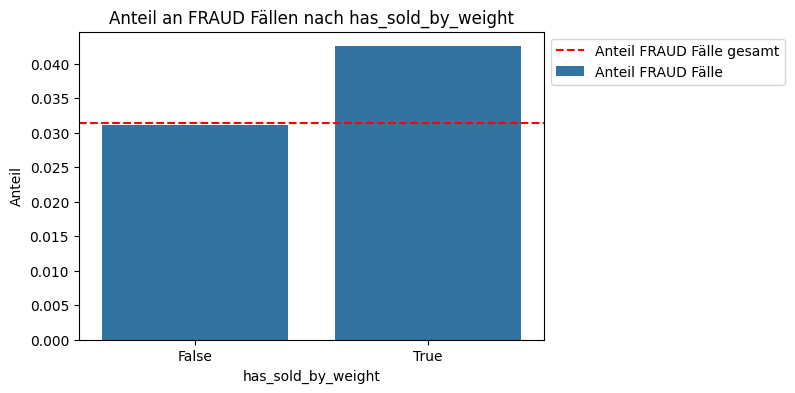

/tmp/ipykernel_10570/851633957.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=angle)
/tmp/ipykernel_10570/851633957.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=angle)


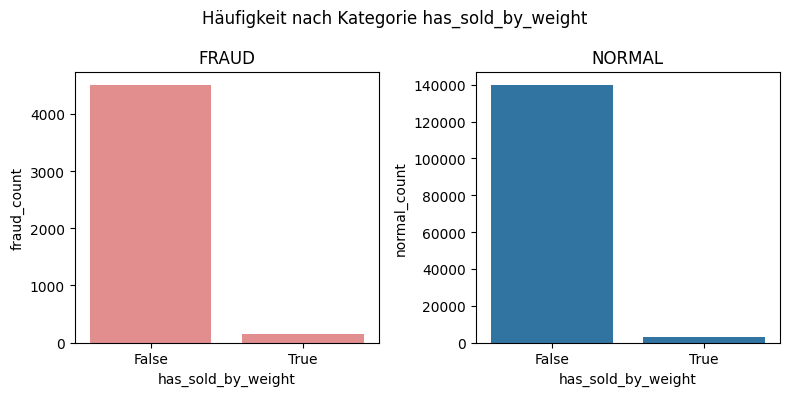




--------------------------------------------------

Plotting has_camera_detected_wrong_product...
shape: (2, 5)
┌─────────────────────────────────┬────────┬─────────────┬──────────────┬────────────┐
│ has_camera_detected_wrong_prod… ┆ total  ┆ fraud_count ┆ normal_count ┆ fraud_rate │
│ ---                             ┆ ---    ┆ ---         ┆ ---          ┆ ---        │
│ bool                            ┆ u32    ┆ u32         ┆ u32          ┆ f64        │
╞═════════════════════════════════╪════════╪═════════════╪══════════════╪════════════╡
│ false                           ┆ 111379 ┆ 3070        ┆ 108309       ┆ 0.027564   │
│ true                            ┆ 36645  ┆ 1585        ┆ 35060        ┆ 0.043253   │
└─────────────────────────────────┴────────┴─────────────┴──────────────┴────────────┘


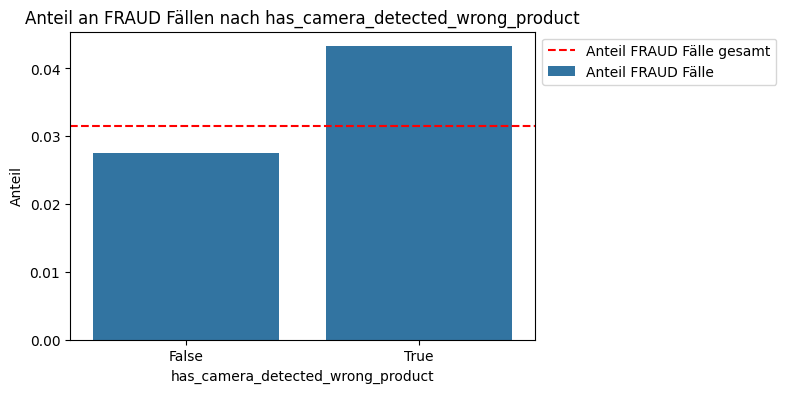

/tmp/ipykernel_10570/851633957.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=angle)
/tmp/ipykernel_10570/851633957.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=angle)


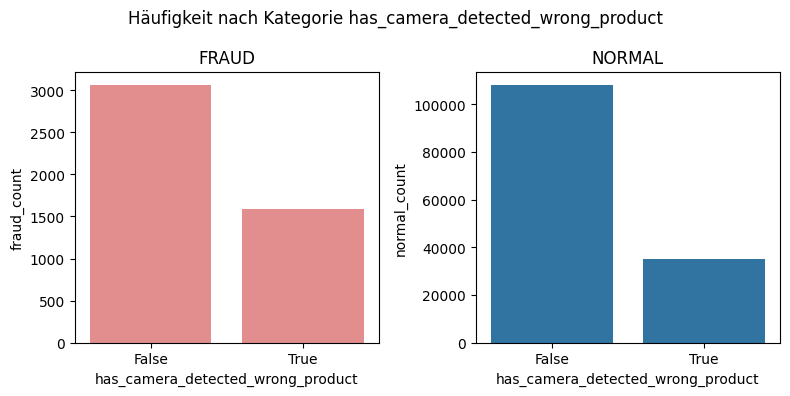




--------------------------------------------------

Plotting has_camera_detected_wrong_product_high_certainty_A...
shape: (2, 5)
┌─────────────────────────────────┬────────┬─────────────┬──────────────┬────────────┐
│ has_camera_detected_wrong_prod… ┆ total  ┆ fraud_count ┆ normal_count ┆ fraud_rate │
│ ---                             ┆ ---    ┆ ---         ┆ ---          ┆ ---        │
│ bool                            ┆ u32    ┆ u32         ┆ u32          ┆ f64        │
╞═════════════════════════════════╪════════╪═════════════╪══════════════╪════════════╡
│ false                           ┆ 130398 ┆ 3601        ┆ 126797       ┆ 0.027615   │
│ true                            ┆ 17626  ┆ 1054        ┆ 16572        ┆ 0.059798   │
└─────────────────────────────────┴────────┴─────────────┴──────────────┴────────────┘


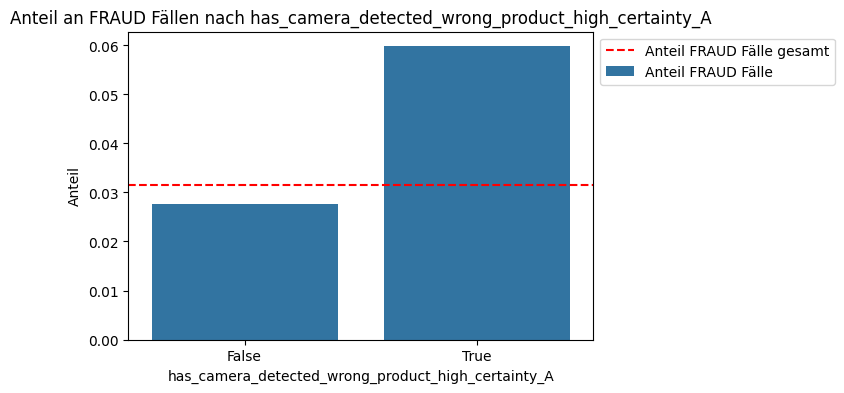

/tmp/ipykernel_10570/851633957.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=angle)
/tmp/ipykernel_10570/851633957.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=angle)


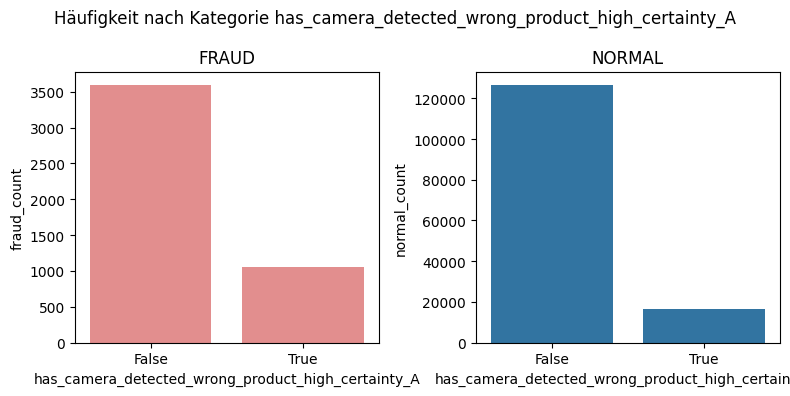




--------------------------------------------------

Plotting has_camera_detected_wrong_product_high_certainty_B...
shape: (2, 5)
┌─────────────────────────────────┬────────┬─────────────┬──────────────┬────────────┐
│ has_camera_detected_wrong_prod… ┆ total  ┆ fraud_count ┆ normal_count ┆ fraud_rate │
│ ---                             ┆ ---    ┆ ---         ┆ ---          ┆ ---        │
│ bool                            ┆ u32    ┆ u32         ┆ u32          ┆ f64        │
╞═════════════════════════════════╪════════╪═════════════╪══════════════╪════════════╡
│ false                           ┆ 134578 ┆ 3792        ┆ 130786       ┆ 0.028177   │
│ true                            ┆ 13446  ┆ 863         ┆ 12583        ┆ 0.064183   │
└─────────────────────────────────┴────────┴─────────────┴──────────────┴────────────┘


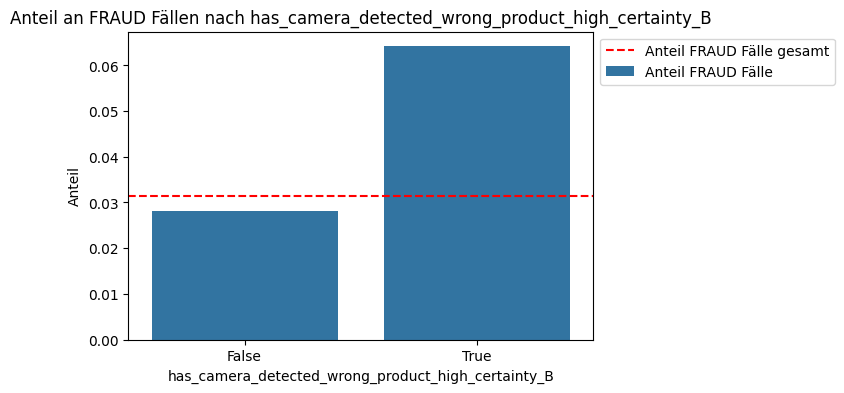

/tmp/ipykernel_10570/851633957.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=angle)
/tmp/ipykernel_10570/851633957.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=angle)


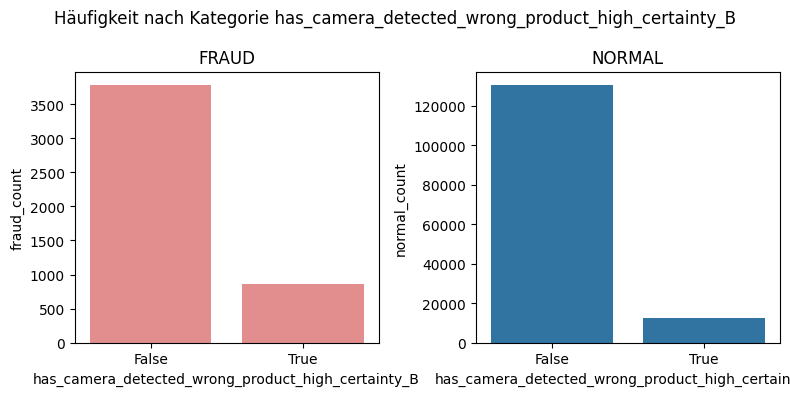




--------------------------------------------------

Plotting has_camera_detected_wrong_product_high_certainty_C...
shape: (2, 5)
┌─────────────────────────────────┬────────┬─────────────┬──────────────┬────────────┐
│ has_camera_detected_wrong_prod… ┆ total  ┆ fraud_count ┆ normal_count ┆ fraud_rate │
│ ---                             ┆ ---    ┆ ---         ┆ ---          ┆ ---        │
│ bool                            ┆ u32    ┆ u32         ┆ u32          ┆ f64        │
╞═════════════════════════════════╪════════╪═════════════╪══════════════╪════════════╡
│ false                           ┆ 136336 ┆ 3886        ┆ 132450       ┆ 0.028503   │
│ true                            ┆ 11688  ┆ 769         ┆ 10919        ┆ 0.065794   │
└─────────────────────────────────┴────────┴─────────────┴──────────────┴────────────┘


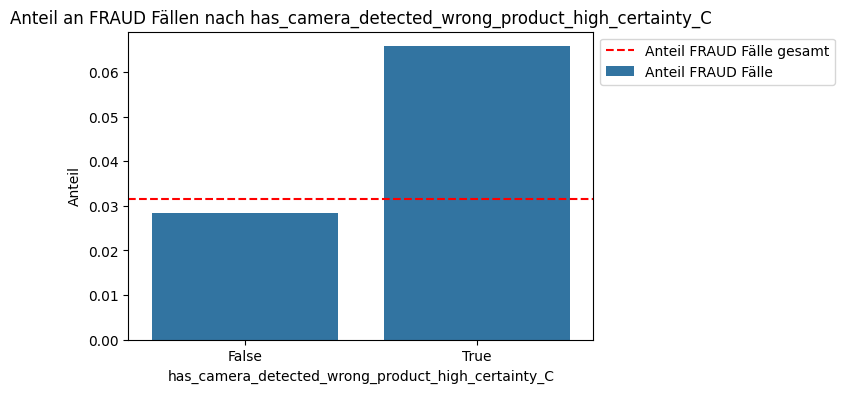

/tmp/ipykernel_10570/851633957.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=angle)
/tmp/ipykernel_10570/851633957.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=angle)


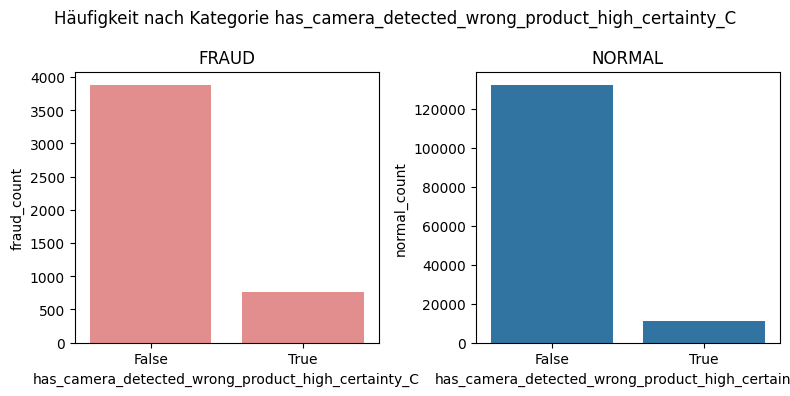




--------------------------------------------------

Plotting has_positive_price_difference...
shape: (2, 5)
┌───────────────────────────────┬────────┬─────────────┬──────────────┬────────────┐
│ has_positive_price_difference ┆ total  ┆ fraud_count ┆ normal_count ┆ fraud_rate │
│ ---                           ┆ ---    ┆ ---         ┆ ---          ┆ ---        │
│ bool                          ┆ u32    ┆ u32         ┆ u32          ┆ f64        │
╞═══════════════════════════════╪════════╪═════════════╪══════════════╪════════════╡
│ false                         ┆ 136910 ┆ 1942        ┆ 134968       ┆ 0.014185   │
│ true                          ┆ 11114  ┆ 2713        ┆ 8401         ┆ 0.244107   │
└───────────────────────────────┴────────┴─────────────┴──────────────┴────────────┘


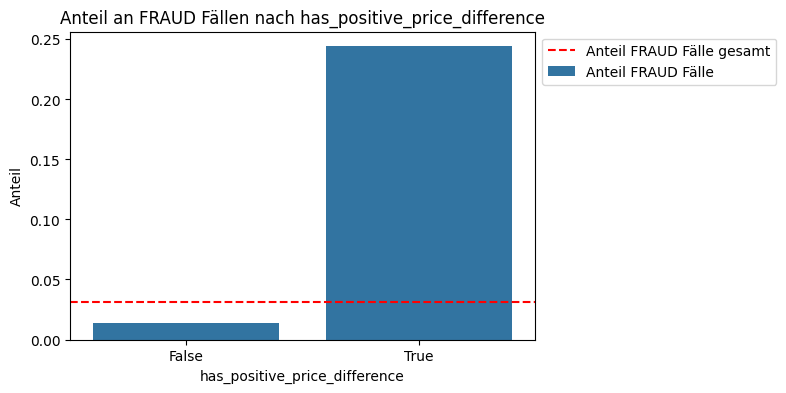

/tmp/ipykernel_10570/851633957.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=angle)
/tmp/ipykernel_10570/851633957.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=angle)


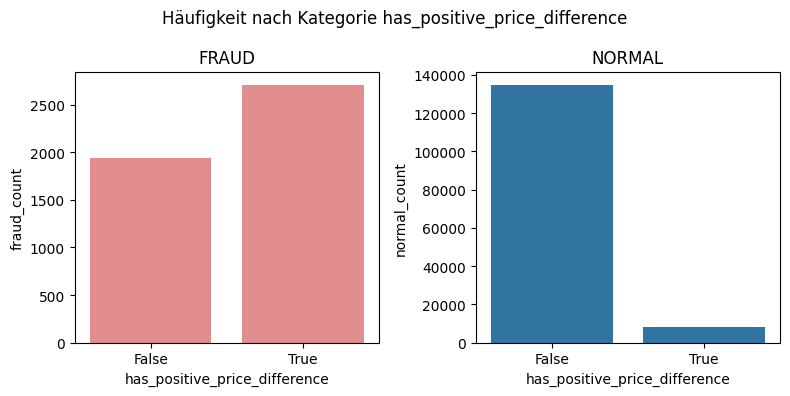




--------------------------------------------------

Plotting has_limited_time_offers...
shape: (1, 5)
┌─────────────────────────┬────────┬─────────────┬──────────────┬────────────┐
│ has_limited_time_offers ┆ total  ┆ fraud_count ┆ normal_count ┆ fraud_rate │
│ ---                     ┆ ---    ┆ ---         ┆ ---          ┆ ---        │
│ bool                    ┆ u32    ┆ u32         ┆ u32          ┆ f64        │
╞═════════════════════════╪════════╪═════════════╪══════════════╪════════════╡
│ false                   ┆ 148024 ┆ 4655        ┆ 143369       ┆ 0.031448   │
└─────────────────────────┴────────┴─────────────┴──────────────┴────────────┘


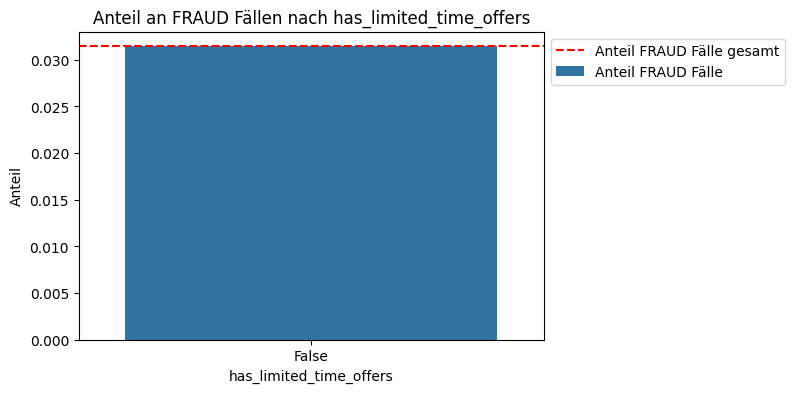

/tmp/ipykernel_10570/851633957.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=angle)
/tmp/ipykernel_10570/851633957.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=angle)


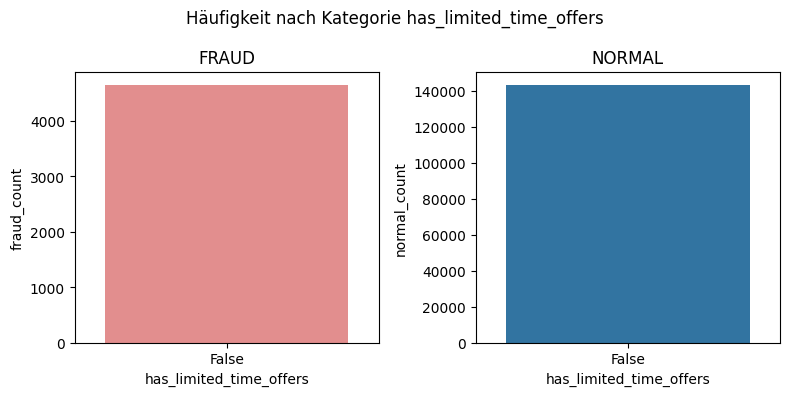




--------------------------------------------------

Plotting has_personal_care...
shape: (2, 5)
┌───────────────────┬────────┬─────────────┬──────────────┬────────────┐
│ has_personal_care ┆ total  ┆ fraud_count ┆ normal_count ┆ fraud_rate │
│ ---               ┆ ---    ┆ ---         ┆ ---          ┆ ---        │
│ bool              ┆ u32    ┆ u32         ┆ u32          ┆ f64        │
╞═══════════════════╪════════╪═════════════╪══════════════╪════════════╡
│ false             ┆ 136449 ┆ 4283        ┆ 132166       ┆ 0.031389   │
│ true              ┆ 11575  ┆ 372         ┆ 11203        ┆ 0.032138   │
└───────────────────┴────────┴─────────────┴──────────────┴────────────┘


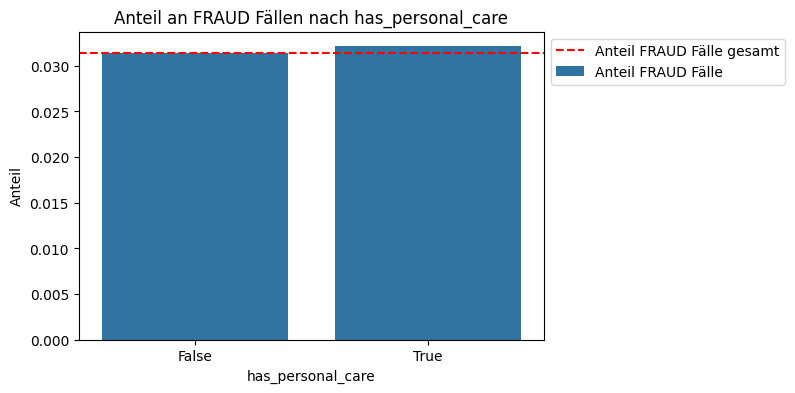

/tmp/ipykernel_10570/851633957.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=angle)
/tmp/ipykernel_10570/851633957.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=angle)


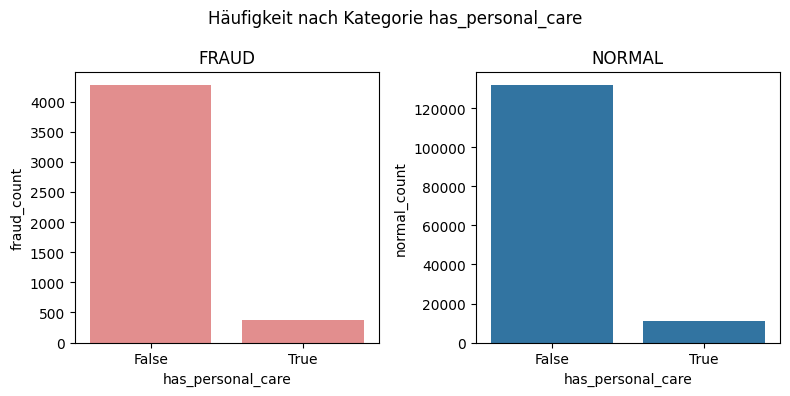




--------------------------------------------------

Plotting has_frozen_goods...
shape: (2, 5)
┌──────────────────┬───────┬─────────────┬──────────────┬────────────┐
│ has_frozen_goods ┆ total ┆ fraud_count ┆ normal_count ┆ fraud_rate │
│ ---              ┆ ---   ┆ ---         ┆ ---          ┆ ---        │
│ bool             ┆ u32   ┆ u32         ┆ u32          ┆ f64        │
╞══════════════════╪═══════╪═════════════╪══════════════╪════════════╡
│ false            ┆ 87356 ┆ 2836        ┆ 84520        ┆ 0.032465   │
│ true             ┆ 60668 ┆ 1819        ┆ 58849        ┆ 0.029983   │
└──────────────────┴───────┴─────────────┴──────────────┴────────────┘


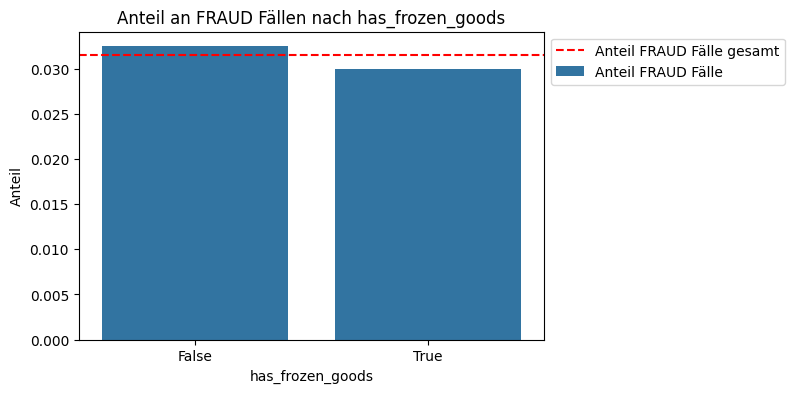

/tmp/ipykernel_10570/851633957.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=angle)
/tmp/ipykernel_10570/851633957.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=angle)


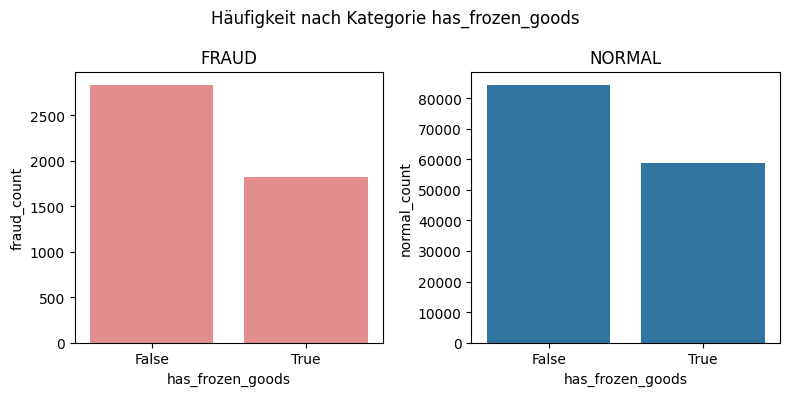




--------------------------------------------------

Plotting has_fruits_vegetables_pieces...
shape: (2, 5)
┌──────────────────────────────┬────────┬─────────────┬──────────────┬────────────┐
│ has_fruits_vegetables_pieces ┆ total  ┆ fraud_count ┆ normal_count ┆ fraud_rate │
│ ---                          ┆ ---    ┆ ---         ┆ ---          ┆ ---        │
│ bool                         ┆ u32    ┆ u32         ┆ u32          ┆ f64        │
╞══════════════════════════════╪════════╪═════════════╪══════════════╪════════════╡
│ false                        ┆ 22493  ┆ 824         ┆ 21669        ┆ 0.036634   │
│ true                         ┆ 125531 ┆ 3831        ┆ 121700       ┆ 0.030518   │
└──────────────────────────────┴────────┴─────────────┴──────────────┴────────────┘


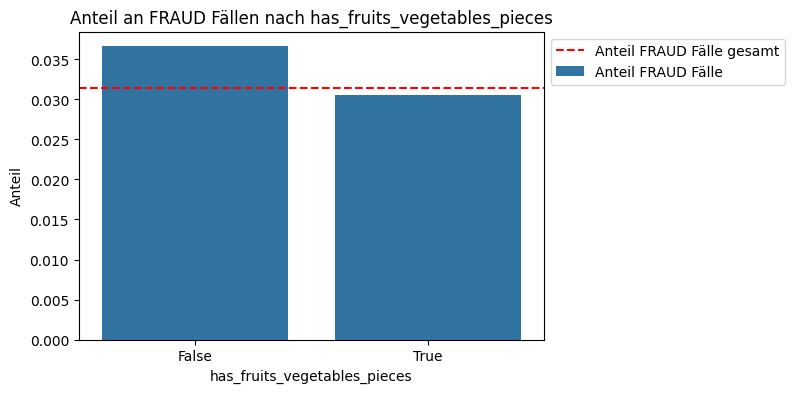

/tmp/ipykernel_10570/851633957.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=angle)
/tmp/ipykernel_10570/851633957.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=angle)


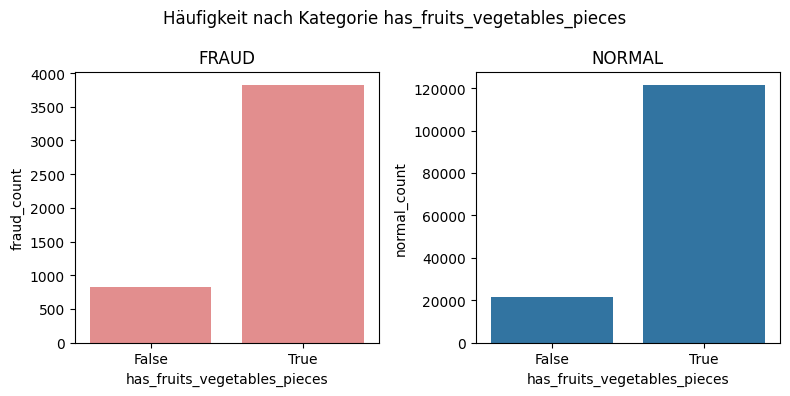




--------------------------------------------------

Plotting has_bakery...
shape: (2, 5)
┌────────────┬────────┬─────────────┬──────────────┬────────────┐
│ has_bakery ┆ total  ┆ fraud_count ┆ normal_count ┆ fraud_rate │
│ ---        ┆ ---    ┆ ---         ┆ ---          ┆ ---        │
│ bool       ┆ u32    ┆ u32         ┆ u32          ┆ f64        │
╞════════════╪════════╪═════════════╪══════════════╪════════════╡
│ false      ┆ 146035 ┆ 4596        ┆ 141439       ┆ 0.031472   │
│ true       ┆ 1989   ┆ 59          ┆ 1930         ┆ 0.029663   │
└────────────┴────────┴─────────────┴──────────────┴────────────┘


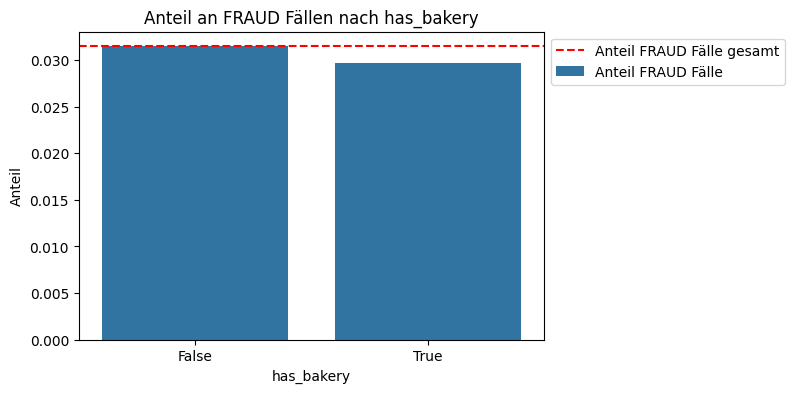

/tmp/ipykernel_10570/851633957.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=angle)
/tmp/ipykernel_10570/851633957.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=angle)


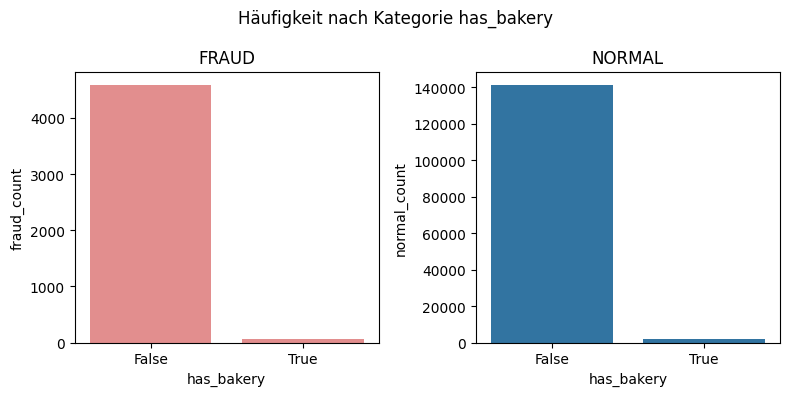




--------------------------------------------------

Plotting has_long_shelf_life...
shape: (2, 5)
┌─────────────────────┬────────┬─────────────┬──────────────┬────────────┐
│ has_long_shelf_life ┆ total  ┆ fraud_count ┆ normal_count ┆ fraud_rate │
│ ---                 ┆ ---    ┆ ---         ┆ ---          ┆ ---        │
│ bool                ┆ u32    ┆ u32         ┆ u32          ┆ f64        │
╞═════════════════════╪════════╪═════════════╪══════════════╪════════════╡
│ false               ┆ 112394 ┆ 3656        ┆ 108738       ┆ 0.032528   │
│ true                ┆ 35630  ┆ 999         ┆ 34631        ┆ 0.028038   │
└─────────────────────┴────────┴─────────────┴──────────────┴────────────┘


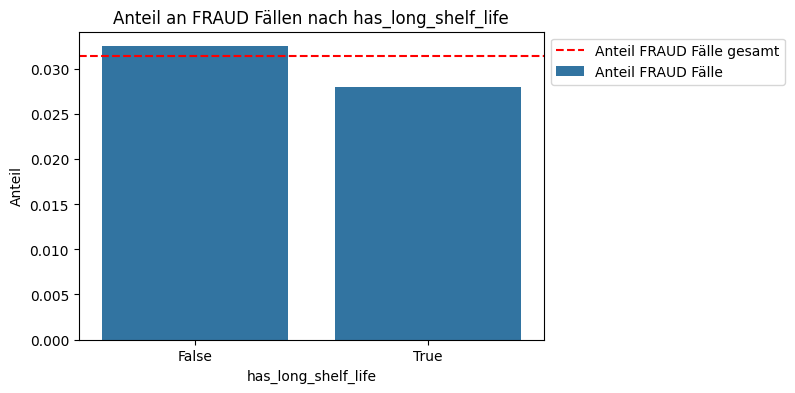

/tmp/ipykernel_10570/851633957.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=angle)
/tmp/ipykernel_10570/851633957.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=angle)


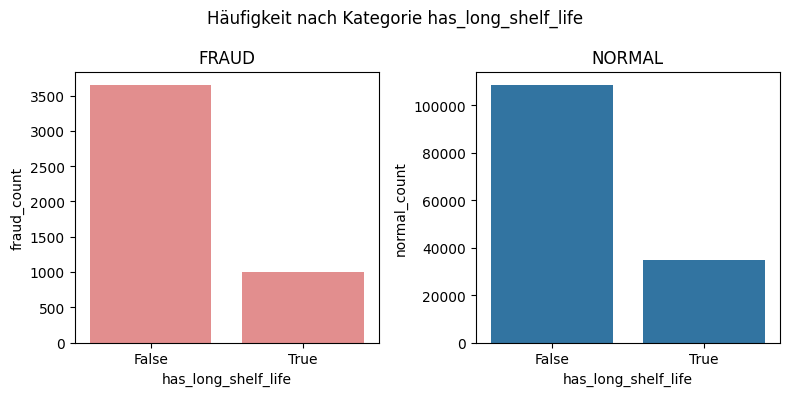




--------------------------------------------------

Plotting has_dairy...
shape: (2, 5)
┌───────────┬────────┬─────────────┬──────────────┬────────────┐
│ has_dairy ┆ total  ┆ fraud_count ┆ normal_count ┆ fraud_rate │
│ ---       ┆ ---    ┆ ---         ┆ ---          ┆ ---        │
│ bool      ┆ u32    ┆ u32         ┆ u32          ┆ f64        │
╞═══════════╪════════╪═════════════╪══════════════╪════════════╡
│ false     ┆ 106717 ┆ 3235        ┆ 103482       ┆ 0.030314   │
│ true      ┆ 41307  ┆ 1420        ┆ 39887        ┆ 0.034377   │
└───────────┴────────┴─────────────┴──────────────┴────────────┘


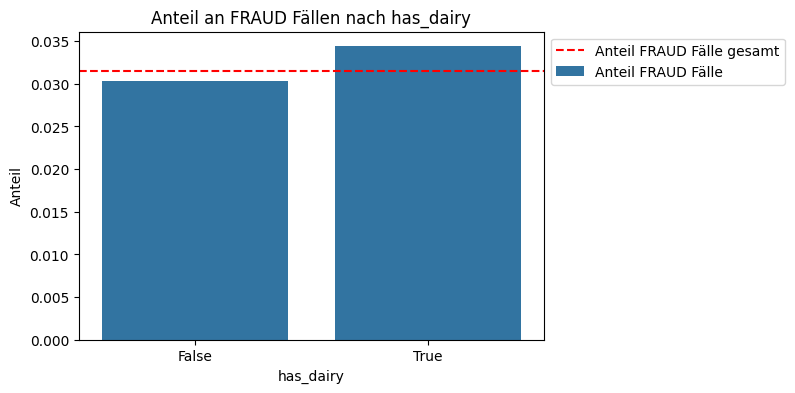

/tmp/ipykernel_10570/851633957.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=angle)
/tmp/ipykernel_10570/851633957.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=angle)


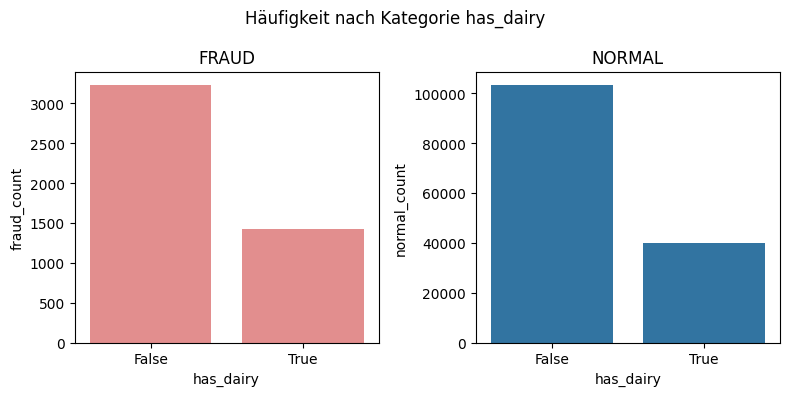




--------------------------------------------------

Plotting has_convenience...
shape: (2, 5)
┌─────────────────┬────────┬─────────────┬──────────────┬────────────┐
│ has_convenience ┆ total  ┆ fraud_count ┆ normal_count ┆ fraud_rate │
│ ---             ┆ ---    ┆ ---         ┆ ---          ┆ ---        │
│ bool            ┆ u32    ┆ u32         ┆ u32          ┆ f64        │
╞═════════════════╪════════╪═════════════╪══════════════╪════════════╡
│ false           ┆ 121220 ┆ 3630        ┆ 117590       ┆ 0.029946   │
│ true            ┆ 26804  ┆ 1025        ┆ 25779        ┆ 0.038241   │
└─────────────────┴────────┴─────────────┴──────────────┴────────────┘


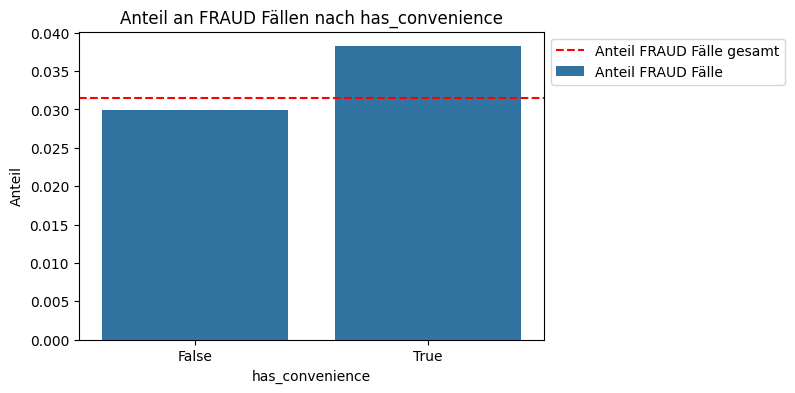

/tmp/ipykernel_10570/851633957.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=angle)
/tmp/ipykernel_10570/851633957.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=angle)


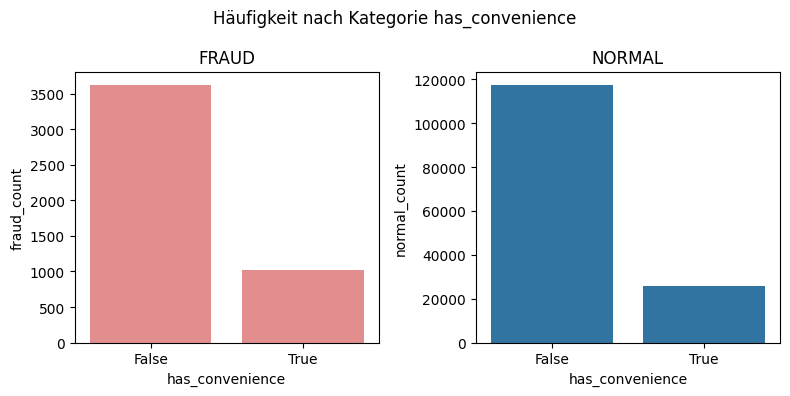




--------------------------------------------------

Plotting has_tobacco...
shape: (2, 5)
┌─────────────┬────────┬─────────────┬──────────────┬────────────┐
│ has_tobacco ┆ total  ┆ fraud_count ┆ normal_count ┆ fraud_rate │
│ ---         ┆ ---    ┆ ---         ┆ ---          ┆ ---        │
│ bool        ┆ u32    ┆ u32         ┆ u32          ┆ f64        │
╞═════════════╪════════╪═════════════╪══════════════╪════════════╡
│ false       ┆ 147210 ┆ 4632        ┆ 142578       ┆ 0.031465   │
│ true        ┆ 814    ┆ 23          ┆ 791          ┆ 0.028256   │
└─────────────┴────────┴─────────────┴──────────────┴────────────┘


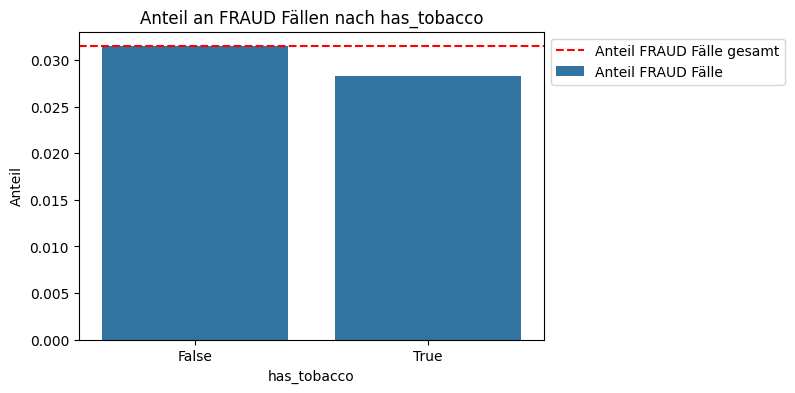

/tmp/ipykernel_10570/851633957.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=angle)
/tmp/ipykernel_10570/851633957.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=angle)


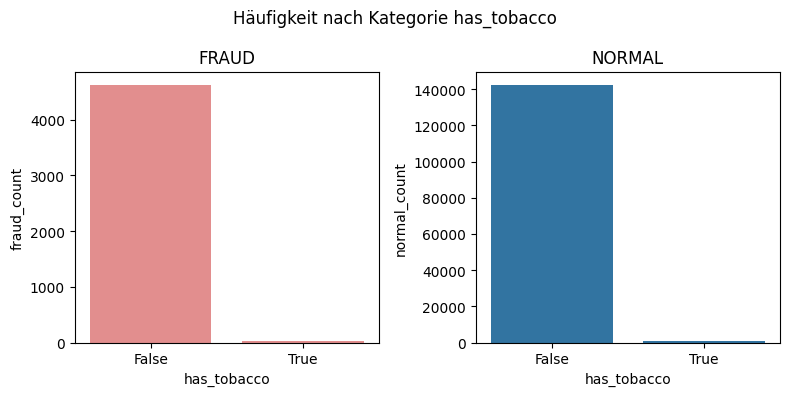




--------------------------------------------------

Plotting has_beverages...
shape: (2, 5)
┌───────────────┬────────┬─────────────┬──────────────┬────────────┐
│ has_beverages ┆ total  ┆ fraud_count ┆ normal_count ┆ fraud_rate │
│ ---           ┆ ---    ┆ ---         ┆ ---          ┆ ---        │
│ bool          ┆ u32    ┆ u32         ┆ u32          ┆ f64        │
╞═══════════════╪════════╪═════════════╪══════════════╪════════════╡
│ false         ┆ 45340  ┆ 1419        ┆ 43921        ┆ 0.031297   │
│ true          ┆ 102684 ┆ 3236        ┆ 99448        ┆ 0.031514   │
└───────────────┴────────┴─────────────┴──────────────┴────────────┘


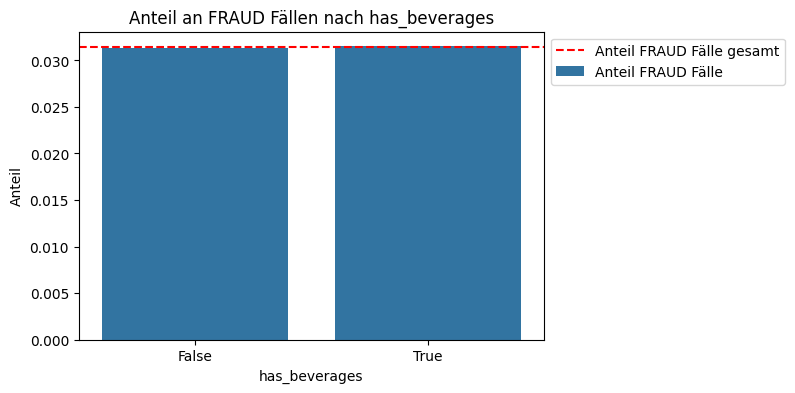

/tmp/ipykernel_10570/851633957.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=angle)
/tmp/ipykernel_10570/851633957.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=angle)


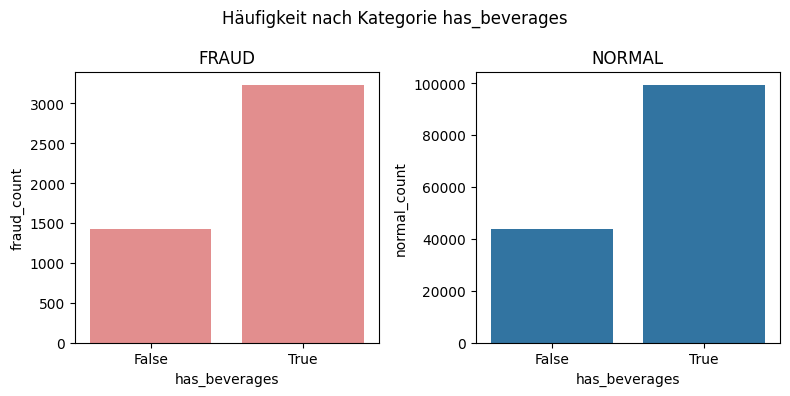




--------------------------------------------------

Plotting has_alcohol...
shape: (2, 5)
┌─────────────┬────────┬─────────────┬──────────────┬────────────┐
│ has_alcohol ┆ total  ┆ fraud_count ┆ normal_count ┆ fraud_rate │
│ ---         ┆ ---    ┆ ---         ┆ ---          ┆ ---        │
│ bool        ┆ u32    ┆ u32         ┆ u32          ┆ f64        │
╞═════════════╪════════╪═════════════╪══════════════╪════════════╡
│ false       ┆ 145606 ┆ 4606        ┆ 141000       ┆ 0.031633   │
│ true        ┆ 2418   ┆ 49          ┆ 2369         ┆ 0.020265   │
└─────────────┴────────┴─────────────┴──────────────┴────────────┘


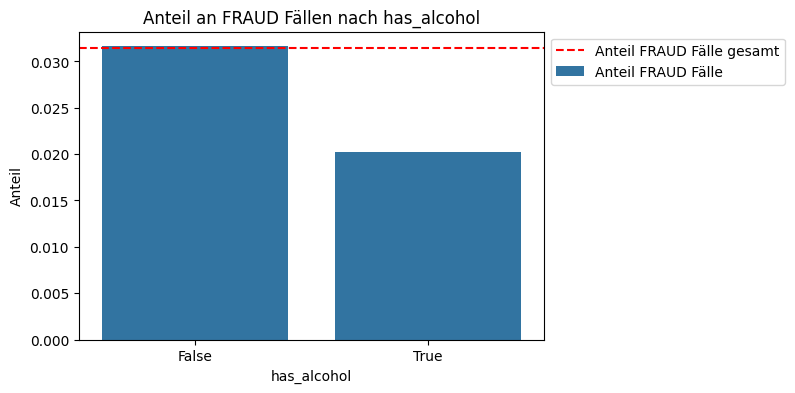

/tmp/ipykernel_10570/851633957.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=angle)
/tmp/ipykernel_10570/851633957.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=angle)


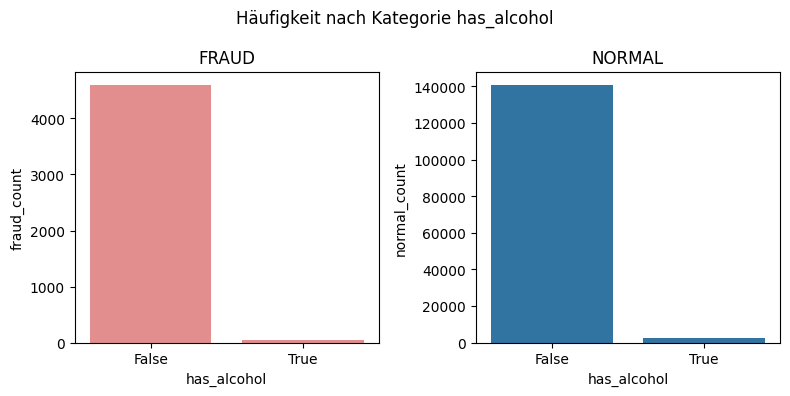




--------------------------------------------------

Plotting has_snacks...
shape: (2, 5)
┌────────────┬────────┬─────────────┬──────────────┬────────────┐
│ has_snacks ┆ total  ┆ fraud_count ┆ normal_count ┆ fraud_rate │
│ ---        ┆ ---    ┆ ---         ┆ ---          ┆ ---        │
│ bool       ┆ u32    ┆ u32         ┆ u32          ┆ f64        │
╞════════════╪════════╪═════════════╪══════════════╪════════════╡
│ false      ┆ 144664 ┆ 4251        ┆ 140413       ┆ 0.029385   │
│ true       ┆ 3360   ┆ 404         ┆ 2956         ┆ 0.120238   │
└────────────┴────────┴─────────────┴──────────────┴────────────┘


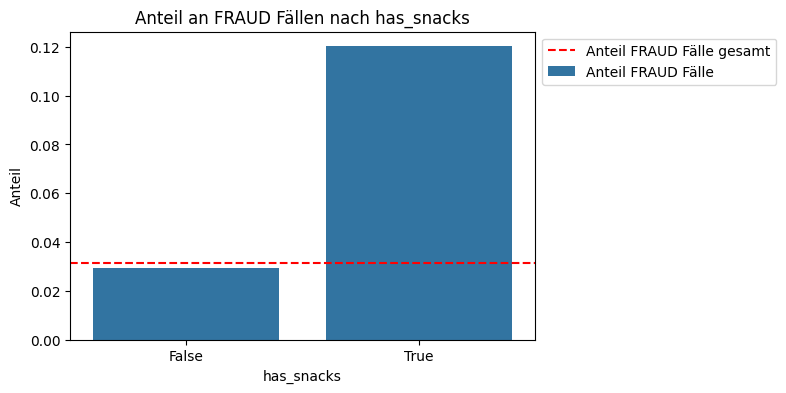

/tmp/ipykernel_10570/851633957.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=angle)
/tmp/ipykernel_10570/851633957.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=angle)


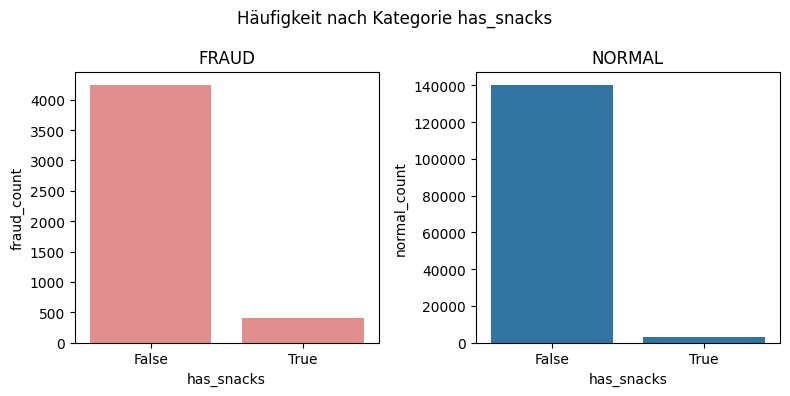




--------------------------------------------------

Plotting has_household...
shape: (2, 5)
┌───────────────┬────────┬─────────────┬──────────────┬────────────┐
│ has_household ┆ total  ┆ fraud_count ┆ normal_count ┆ fraud_rate │
│ ---           ┆ ---    ┆ ---         ┆ ---          ┆ ---        │
│ bool          ┆ u32    ┆ u32         ┆ u32          ┆ f64        │
╞═══════════════╪════════╪═════════════╪══════════════╪════════════╡
│ false         ┆ 142604 ┆ 4486        ┆ 138118       ┆ 0.031458   │
│ true          ┆ 5420   ┆ 169         ┆ 5251         ┆ 0.031181   │
└───────────────┴────────┴─────────────┴──────────────┴────────────┘


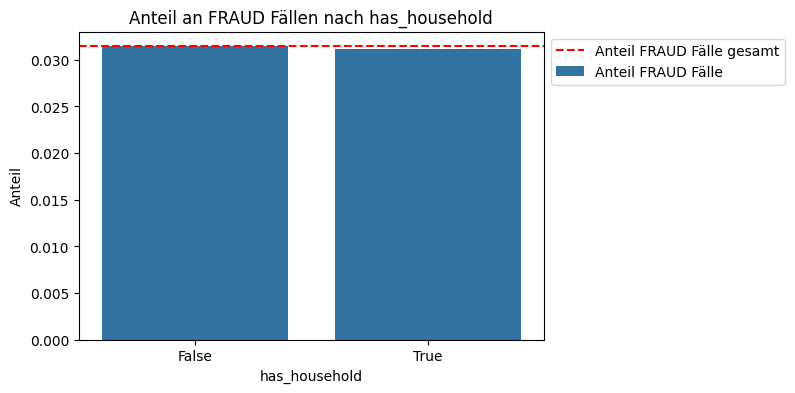

/tmp/ipykernel_10570/851633957.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=angle)
/tmp/ipykernel_10570/851633957.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=angle)


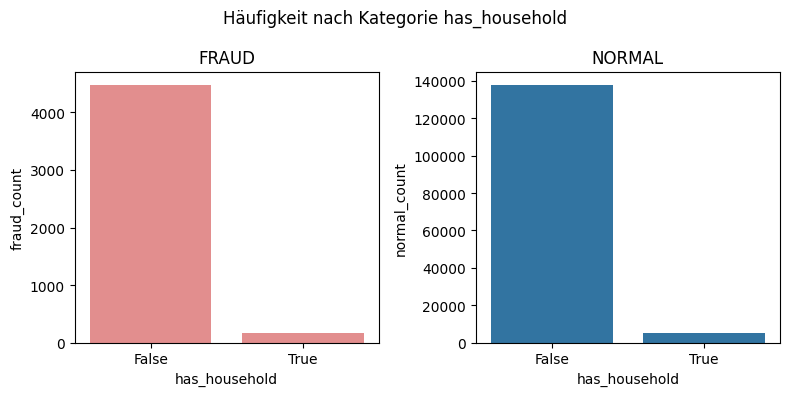




--------------------------------------------------

Plotting has_fruits_vegetables...
shape: (2, 5)
┌───────────────────────┬────────┬─────────────┬──────────────┬────────────┐
│ has_fruits_vegetables ┆ total  ┆ fraud_count ┆ normal_count ┆ fraud_rate │
│ ---                   ┆ ---    ┆ ---         ┆ ---          ┆ ---        │
│ bool                  ┆ u32    ┆ u32         ┆ u32          ┆ f64        │
╞═══════════════════════╪════════╪═════════════╪══════════════╪════════════╡
│ false                 ┆ 144686 ┆ 4513        ┆ 140173       ┆ 0.031192   │
│ true                  ┆ 3338   ┆ 142         ┆ 3196         ┆ 0.04254    │
└───────────────────────┴────────┴─────────────┴──────────────┴────────────┘


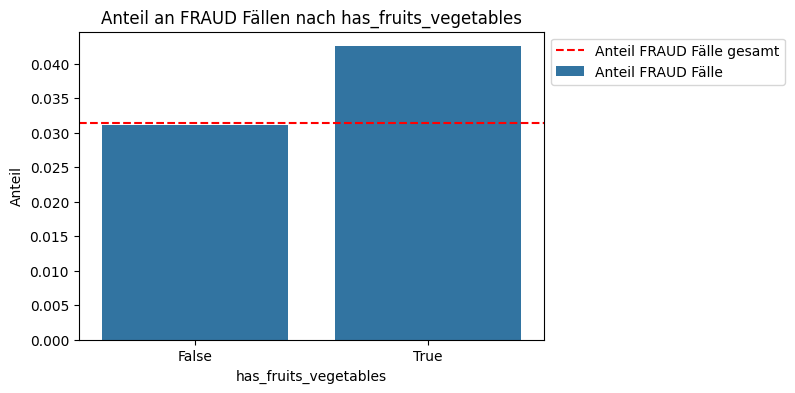

/tmp/ipykernel_10570/851633957.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=angle)
/tmp/ipykernel_10570/851633957.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=angle)


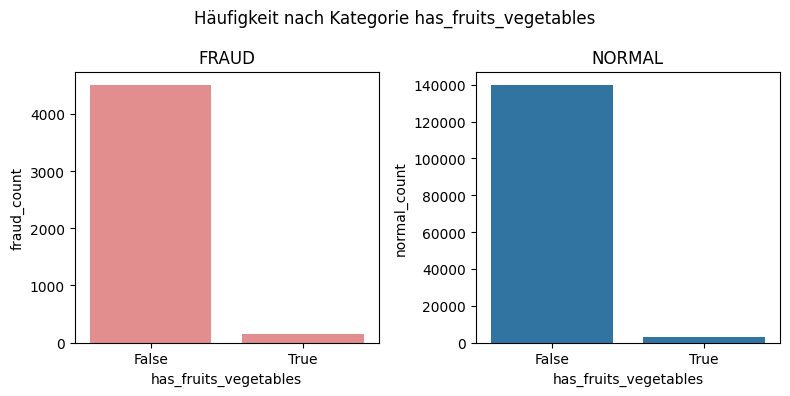




--------------------------------------------------

Plotting has_missing...
shape: (2, 5)
┌─────────────┬────────┬─────────────┬──────────────┬────────────┐
│ has_missing ┆ total  ┆ fraud_count ┆ normal_count ┆ fraud_rate │
│ ---         ┆ ---    ┆ ---         ┆ ---          ┆ ---        │
│ bool        ┆ u32    ┆ u32         ┆ u32          ┆ f64        │
╞═════════════╪════════╪═════════════╪══════════════╪════════════╡
│ false       ┆ 148008 ┆ 4639        ┆ 143369       ┆ 0.031343   │
│ true        ┆ 16     ┆ 16          ┆ 0            ┆ 1.0        │
└─────────────┴────────┴─────────────┴──────────────┴────────────┘


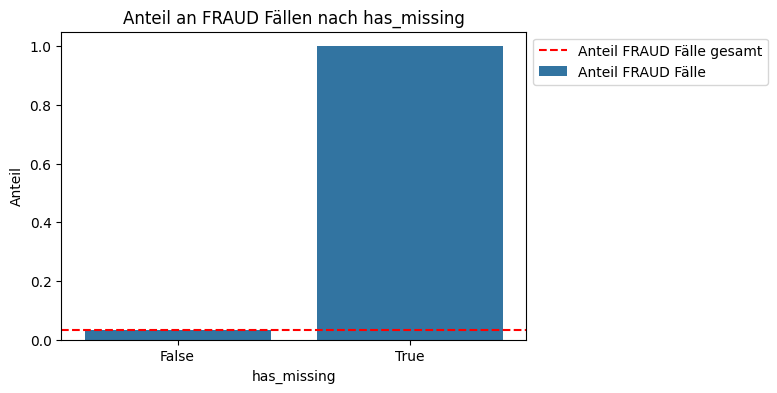

/tmp/ipykernel_10570/851633957.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=angle)
/tmp/ipykernel_10570/851633957.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=angle)


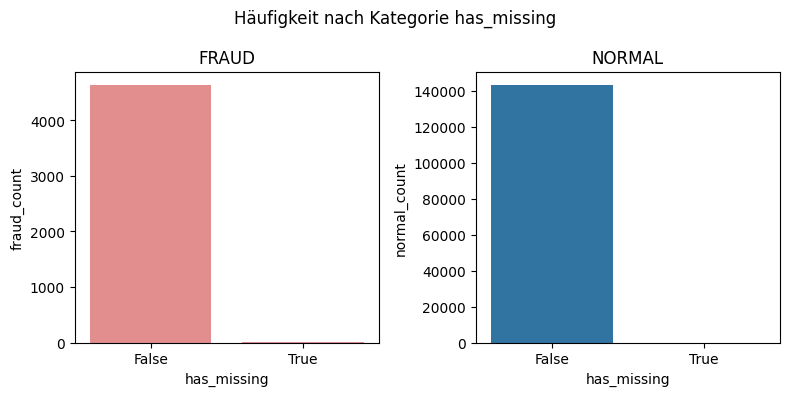

In [29]:
bool_cols = df.select(pl.col(pl.Boolean)).columns

for col in bool_cols:
  print("\n\n")
  print("-" * 50)
  print(f"\nPlotting {col}...")
  plot_categorical_attribute(col)

In [30]:
bool_cols

['has_feedback',
 'feedback_low',
 'feedback_middle',
 'feedback_high',
 'feedback_top',
 'has_voided',
 'has_age_restricted',
 'has_sold_by_weight',
 'has_camera_detected_wrong_product',
 'has_camera_detected_wrong_product_high_certainty_A',
 'has_camera_detected_wrong_product_high_certainty_B',
 'has_camera_detected_wrong_product_high_certainty_C',
 'has_positive_price_difference',
 'has_limited_time_offers',
 'has_personal_care',
 'has_frozen_goods',
 'has_fruits_vegetables_pieces',
 'has_bakery',
 'has_long_shelf_life',
 'has_dairy',
 'has_convenience',
 'has_tobacco',
 'has_beverages',
 'has_alcohol',
 'has_snacks',
 'has_household',
 'has_fruits_vegetables',
 'has_missing']

In [20]:
categories = [
 'has_frozen_goods',
 'has_beverages',
 'has_dairy',
 'has_bakery',
 'has_fruits_vegetables',
 'has_personal_care',
 'has_household',
 'has_tobacco',
 'has_long_shelf_life',
 'has_convenience',
 'has_snacks',
 'has_alcohol',
 'has_fruits_vegetables_pieces',
]

# map categories to German names (without has_prefix)
category_map = {
  'has_frozen_goods': 'Tiefkühlkost',
  'has_beverages': 'Getränke',
  'has_dairy': 'Milchprodukte',
  'has_bakery': 'Backwaren',
  'has_fruits_vegetables': 'Obst/Gemüse',
  'has_personal_care': 'Körperpflege',
  'has_household': 'Haushalt',
  'has_tobacco': 'Tabak',
  'has_long_shelf_life': 'Lange Haltbar',
  'has_convenience': 'Fertigprodukte',
  'has_snacks': 'Snacks',
  'has_alcohol': 'Alkohol',
  'has_fruits_vegetables_pieces': 'Obst/Gemüse (Stück)'
}

  # aggregate: sum the
df_categories = (
  df
  .group_by("label")
  .agg(
    pl.col(col).sum() for col in categories
  )
  .unpivot(index="label")
  .pivot(index="variable", on="label", values="value")
  .with_columns(
    (pl.col("FRAUD") / (pl.col("FRAUD") + pl.col("NORMAL"))).alias("fraud_rate"),
    pl.col("variable").replace_strict(category_map, default=None).alias("Kategorie"),
  )
  .drop("variable")
  .sort("fraud_rate")
)

df_categories


FRAUD,NORMAL,fraud_rate,Kategorie
u32,u32,f64,str
49,2369,0.020265,"""Alkohol"""
999,34631,0.028038,"""Lange Haltbar"""
23,791,0.028256,"""Tabak"""
59,1930,0.029663,"""Backwaren"""
1819,58849,0.029983,"""Tiefkühlkost"""
…,…,…,…
372,11203,0.032138,"""Körperpflege"""
1420,39887,0.034377,"""Milchprodukte"""
1025,25779,0.038241,"""Fertigprodukte"""


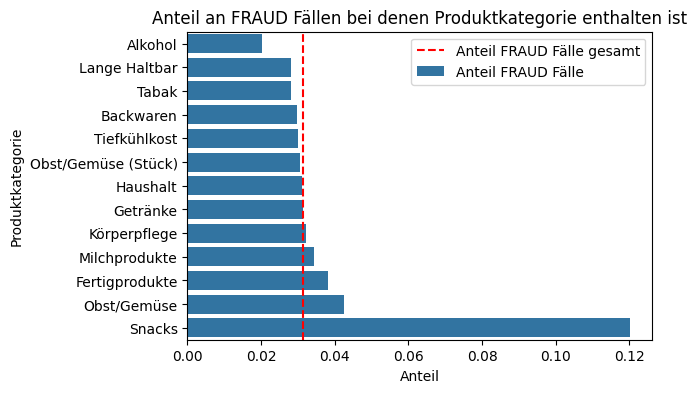

/tmp/ipykernel_18345/1298882035.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=angle)
/tmp/ipykernel_18345/1298882035.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=angle)


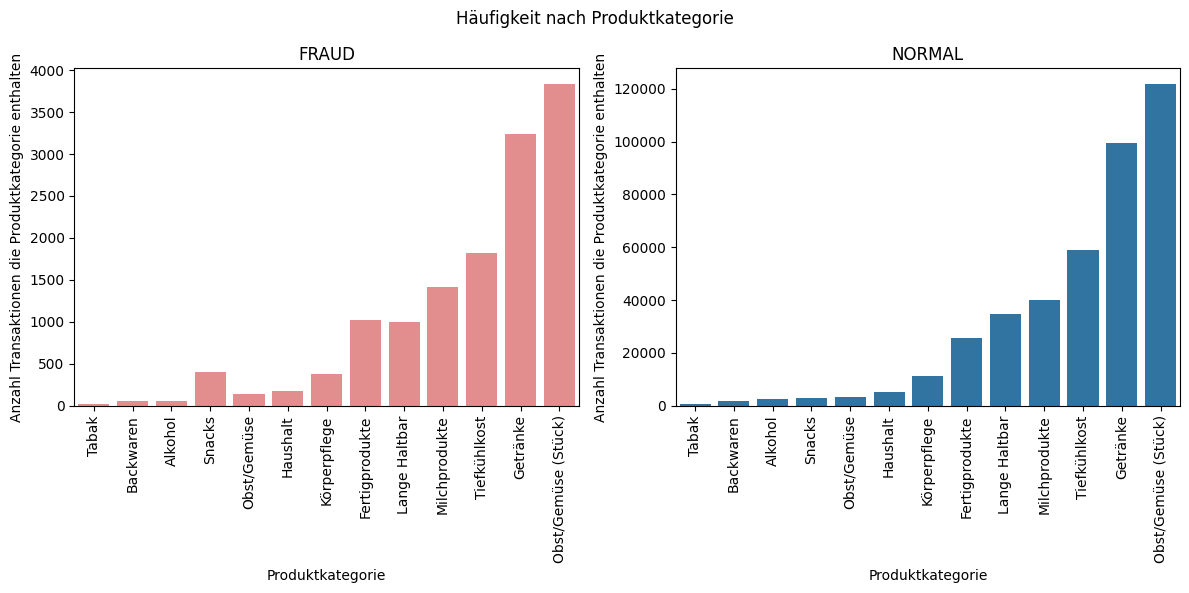

In [21]:
df2 = df_categories

plt.figure(figsize=(6, 4))
sns.barplot(data=df2, y="Kategorie", x='fraud_rate', label='Anteil FRAUD Fälle')

plt.axvline(fraud_rate_total, color='red', linestyle='--', label='Anteil FRAUD Fälle gesamt')

plt.title('Anteil an FRAUD Fällen bei denen Produktkategorie enthalten ist')
plt.ylabel("Produktkategorie")
plt.xlabel('Anteil')
plt.legend(loc="upper right")

plt.savefig(plot_dir / "anteil_fraud_nach_category.png", bbox_inches='tight')
plt.show()

df2 = df2.sort("NORMAL")
angle = 90
col = "Kategorie"
# plot fraud_count and normal_count for each payment_medium (plot with two subplots)
fig, ax = plt.subplots(1, 2, figsize=(12,6), sharex=True)
sns.barplot(x=col, y="FRAUD", data=df2.to_pandas(), ax=ax[0], color="lightcoral")
# axis labels
ax[0].set_xlabel("Produktkategorie")
ax[0].set_ylabel("Anzahl Transaktionen die Produktkategorie enthalten")
ax[0].set_title("FRAUD")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=angle)
sns.barplot(x=col, y="NORMAL", data=df2.to_pandas(), ax=ax[1])
# main title above the two subplots
fig.suptitle("Häufigkeit nach Produktkategorie")
ax[1].set_xlabel("Produktkategorie")
ax[1].set_ylabel("Anzahl Transaktionen die Produktkategorie enthalten")
ax[1].set_title("NORMAL")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=angle)

plt.tight_layout()
plt.savefig(plot_dir / "counts_normal_fraud_category.png")
plt.show()


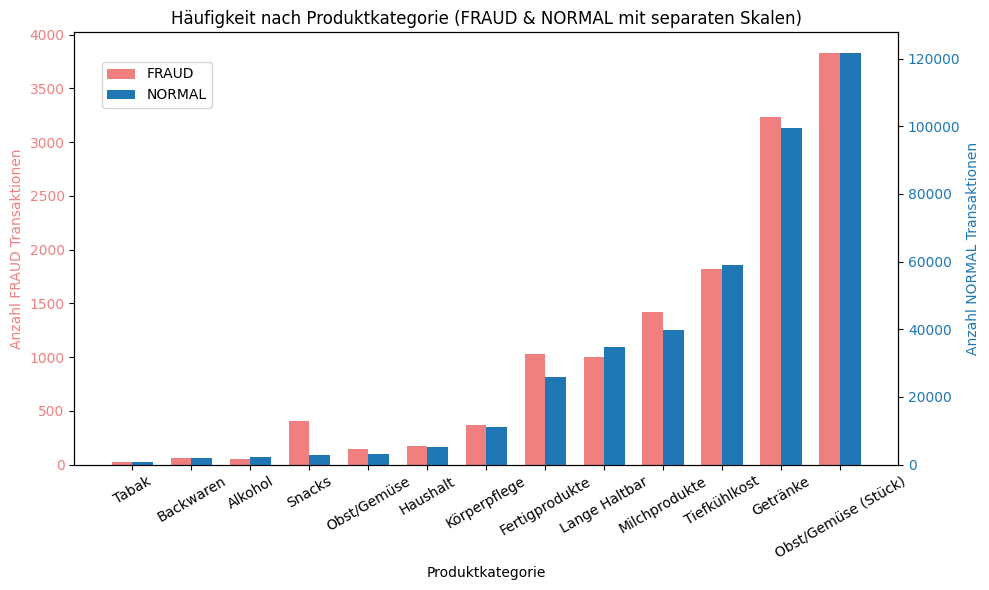

In [ ]:
# Prepare data
df_plot = df2.to_pandas()
categories = df_plot[col]
x = np.arange(len(categories))  # Numeric positions for each category
bar_width = 0.35  # Width of each bar

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot FRAUD bars to the left
fraud_counts = df_plot["FRAUD"]
bars1 = ax1.bar(x - bar_width/2, fraud_counts, width=bar_width, color="lightcoral", label="FRAUD")
ax1.set_ylabel("Anzahl FRAUD Transaktionen", color="lightcoral")
ax1.tick_params(axis='y', labelcolor="lightcoral")

# Twin axis for NORMAL
ax2 = ax1.twinx()
normal_counts = df_plot["NORMAL"]
bars2 = ax2.bar(x + bar_width/2, normal_counts, width=bar_width, color="C0", label="NORMAL")
ax2.set_ylabel("Anzahl NORMAL Transaktionen", color="C0")
ax2.tick_params(axis='y', labelcolor="C0")

# X-axis labels
angle = 30
ax1.set_xticks(x)
ax1.set_xticklabels(categories, rotation=angle)
ax1.set_xlabel("Produktkategorie")

# Title and layout
plt.title("Häufigkeit nach Produktkategorie (FRAUD & NORMAL mit separaten Skalen)")
fig.tight_layout()

# Optional: create a combined legend
lines = [bars1, bars2]
labels = ["FRAUD", "NORMAL"]
fig.legend(lines, labels, loc="upper left", bbox_to_anchor=(0.1, 0.9))

# Save and show
plt.savefig(plot_dir / "counts_normal_fraud_category_dual_axis_offset.png")
plt.show()